In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import matplotlib.pyplot as plt
import seaborn as sns

# 加载 LLaMA-3 模型和 tokenizer
model_name = "meta-llama/Meta-Llama-3-8B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, output_attentions=True)



/home/ljc/miniconda3/envs/fw/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Loading checkpoint shards: 100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


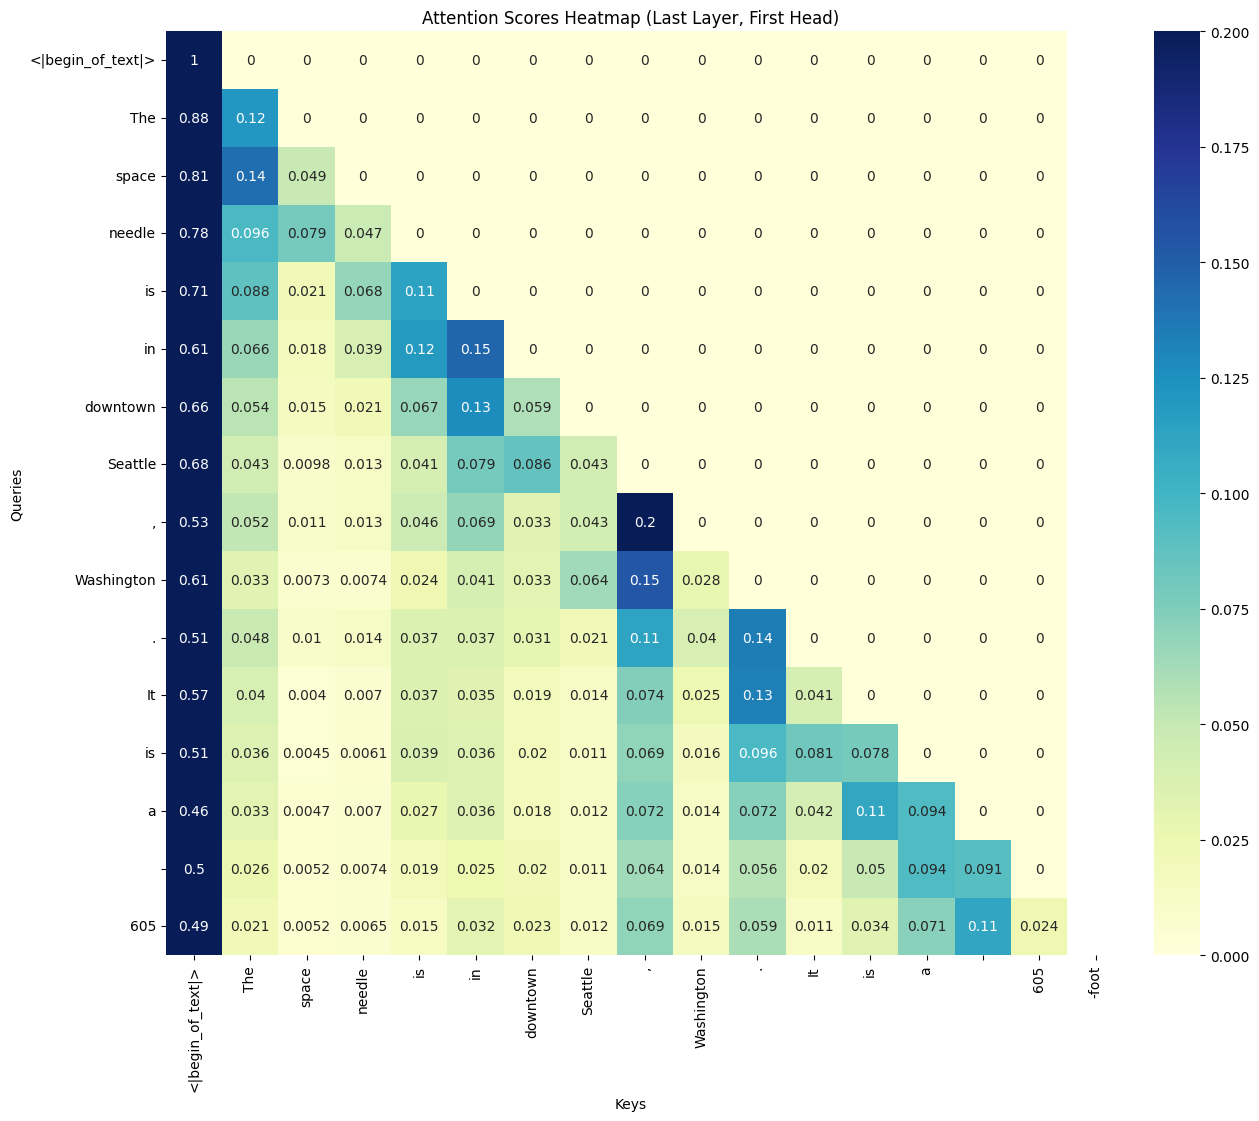

In [4]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
# 输入文本
input_text = "The space needle is in downtown"

# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成 50 个新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 10, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 选择特定层和特定注意力头进行可视化
layer_index = 0  # 最后一层，也可以选择其他层，例如 0 表示第一层
head_index = 0  # 第一个注意力头，也可以选择其他头

# 注意力值的形状是 (num_generate_steps, batch_size, num_heads, sequence_length, sequence_length)
# 将所有生成步骤的注意力值扩展到相同的尺寸并拼接起来
all_attention = []
max_seq_length = max([step[layer_index][0][head_index].shape[-1] for step in attentions])

for step in attentions:
    attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
    attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
    # attn = attn[:,1:]
    # attn = step[layer_index][0][head_index].detach().cpu().numpy()
    pad_width = max_seq_length - attn.shape[-1]
    if pad_width > 0:
        attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
    all_attention.append(attn)

# 将注意力值拼接成一个完整的矩阵
complete_attention = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
plt.title('Attention Scores Heatmap (Last Layer, First Head)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


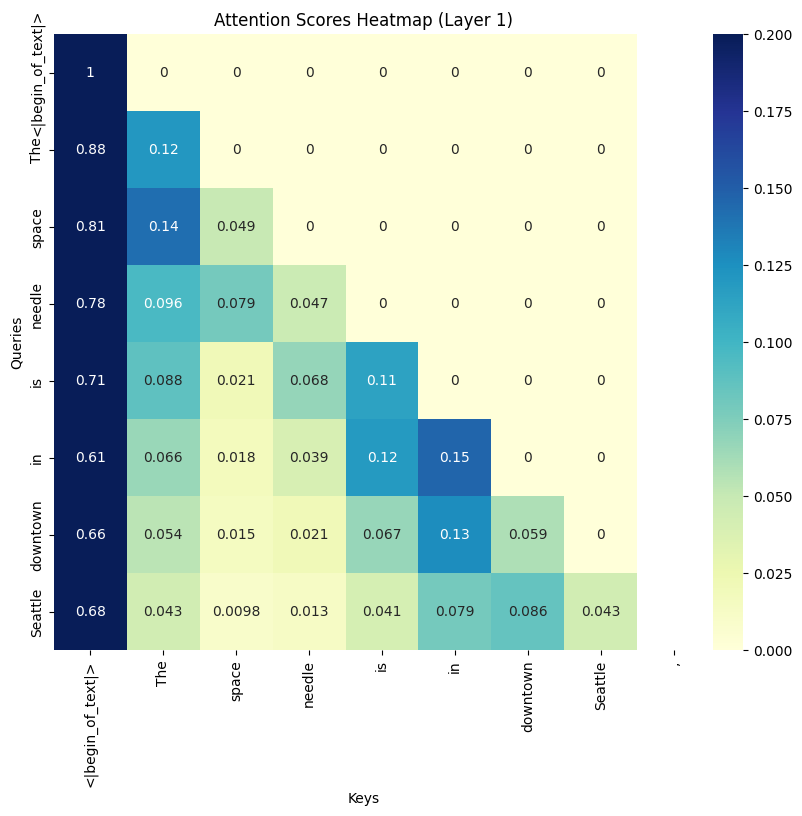

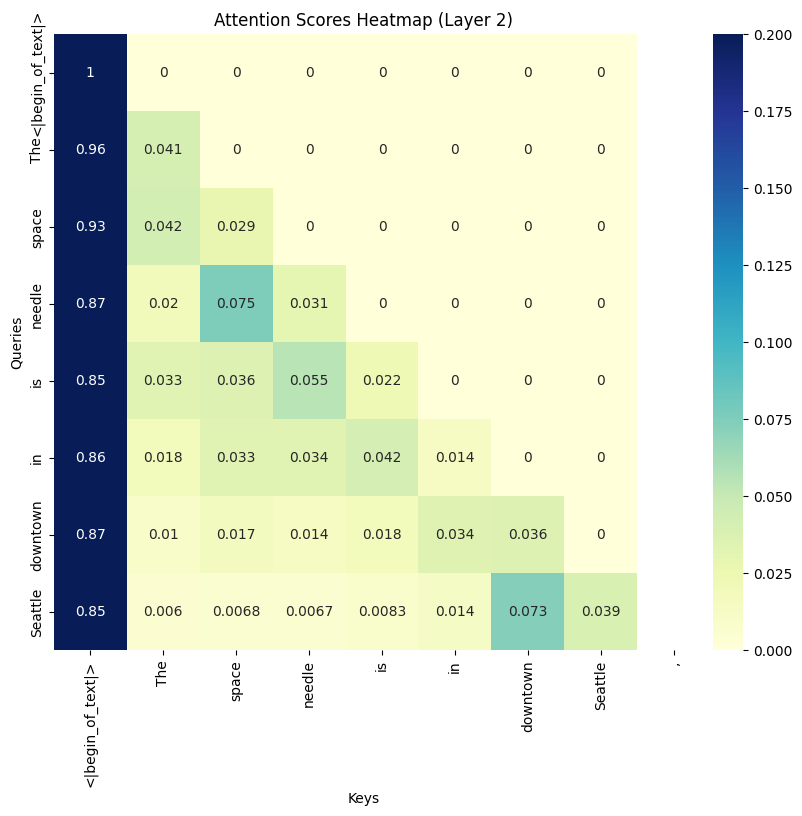

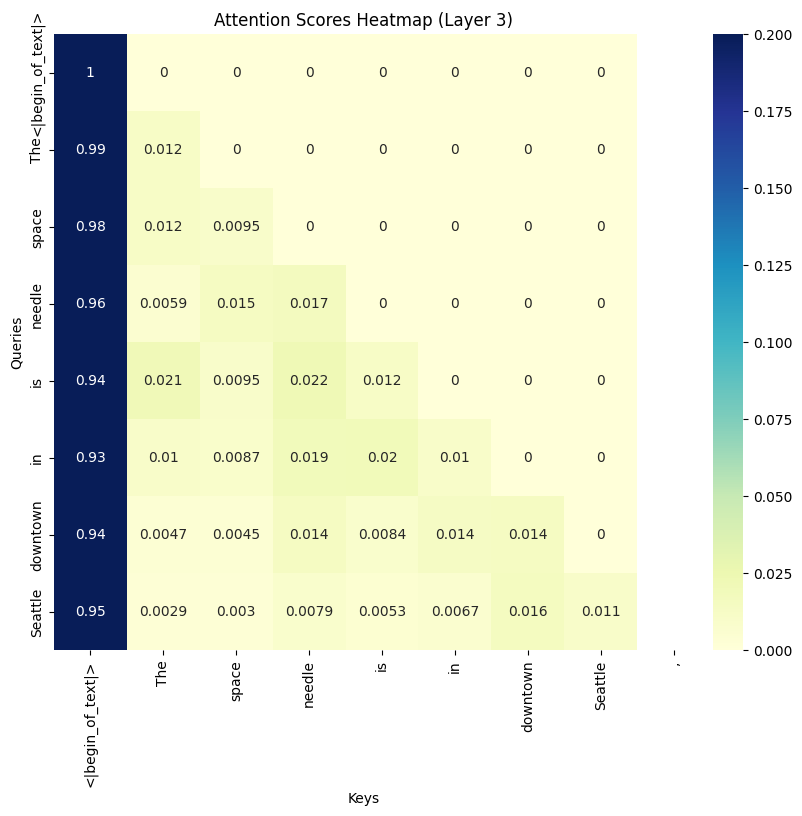

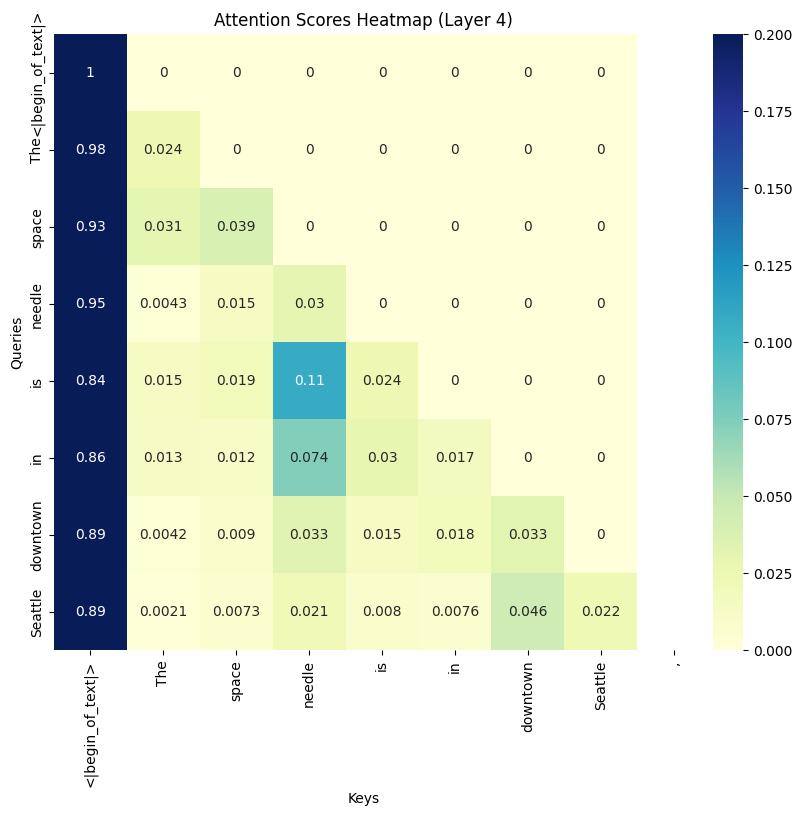

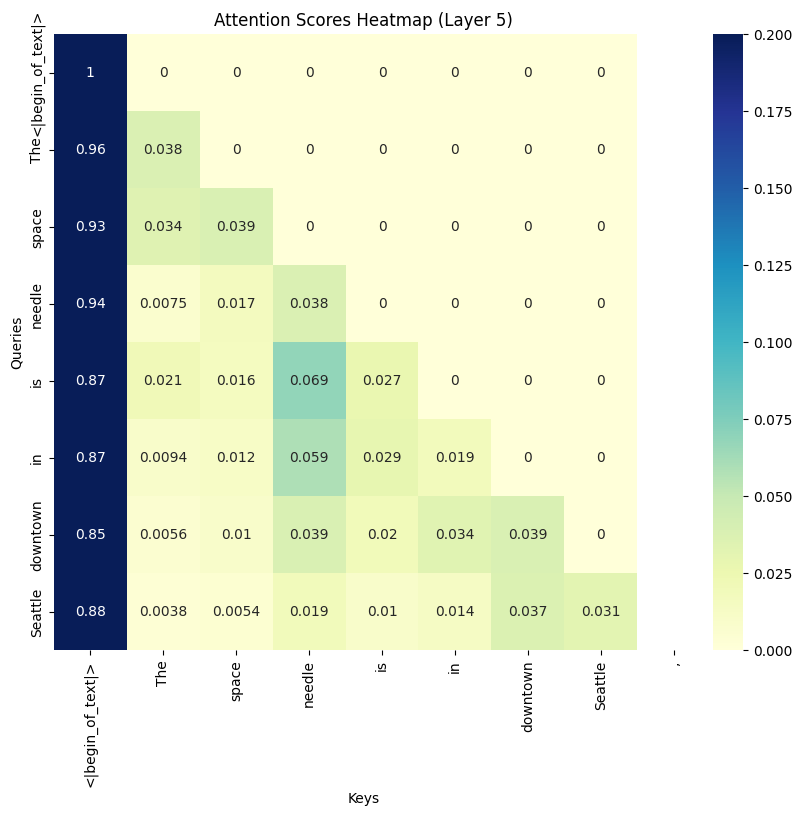

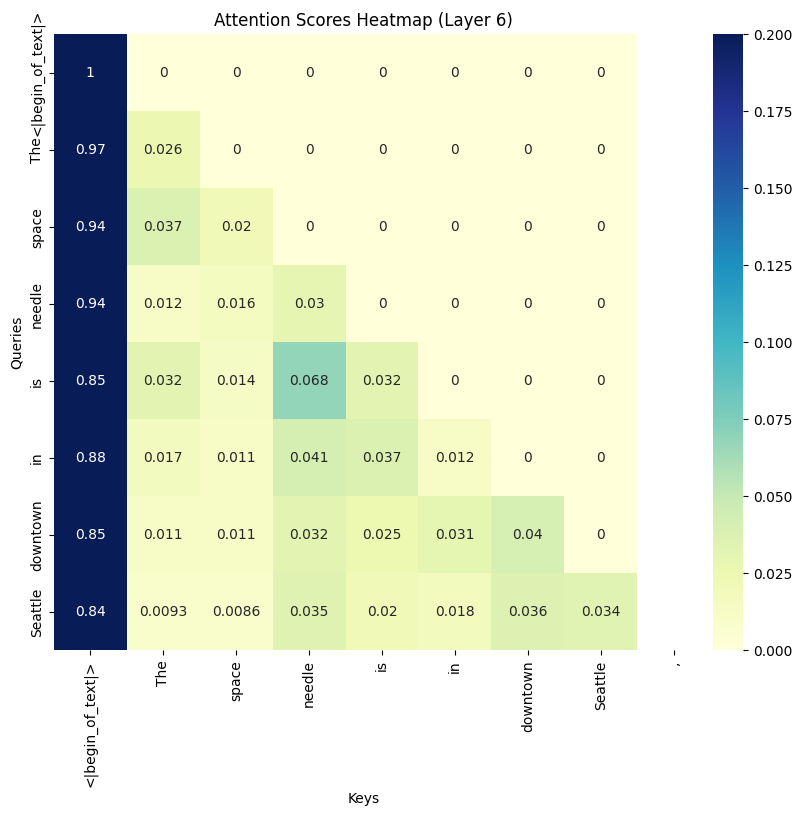

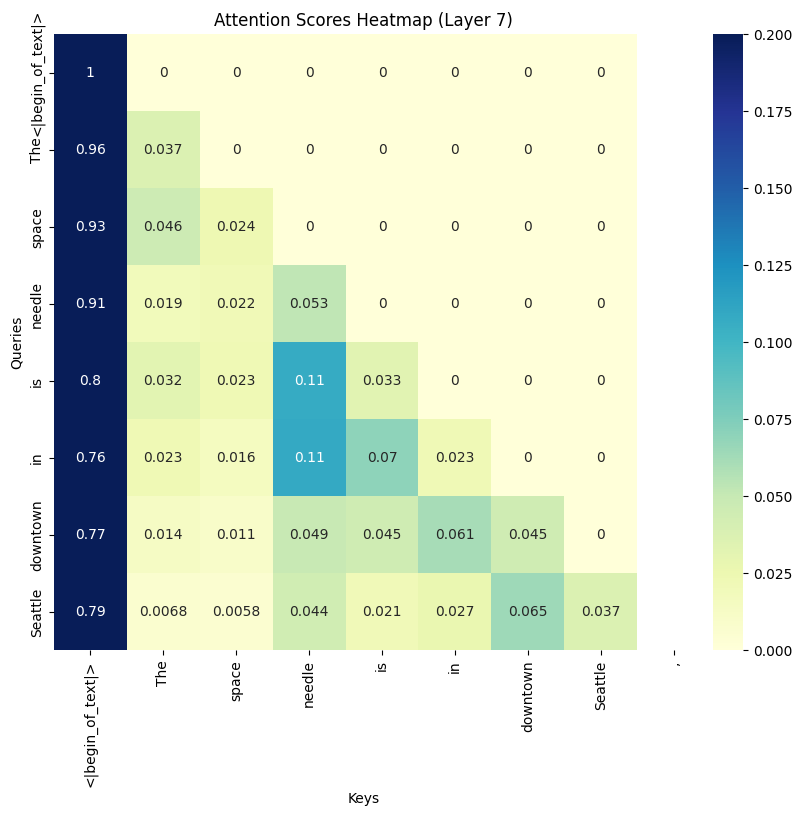

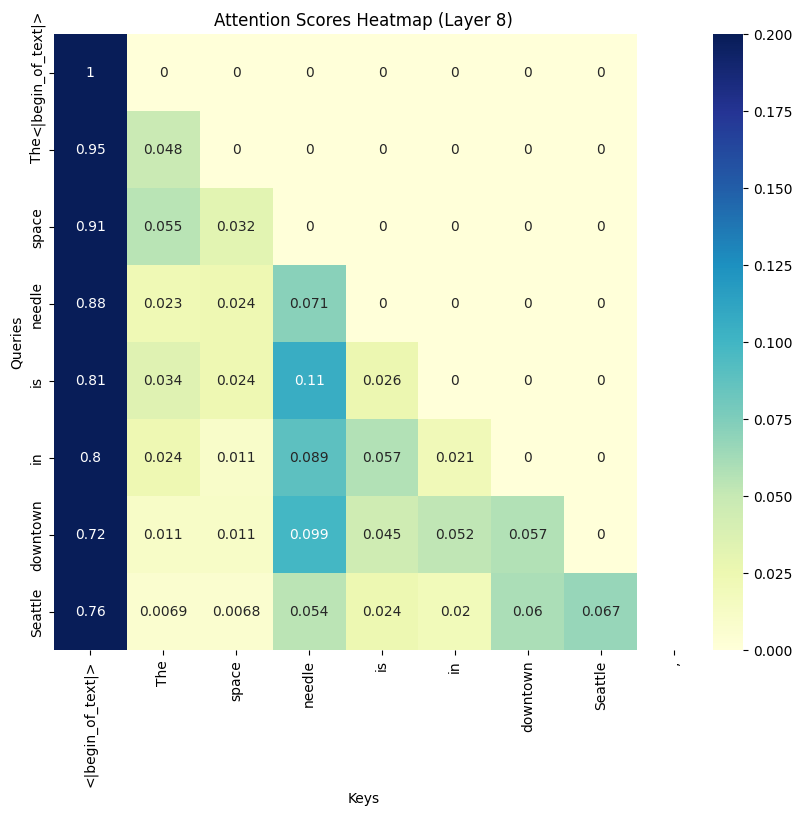

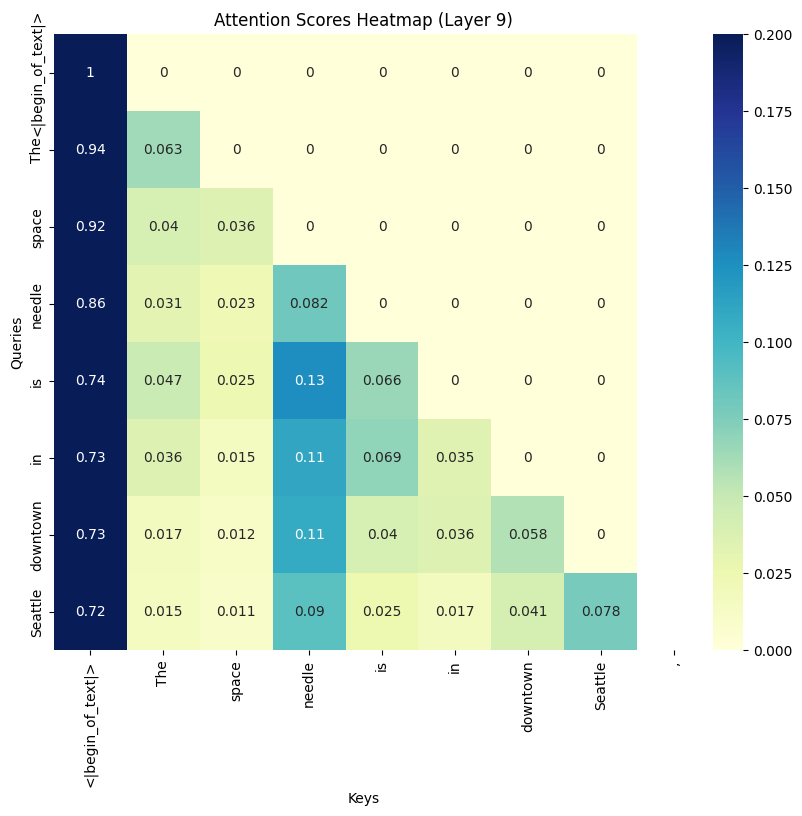

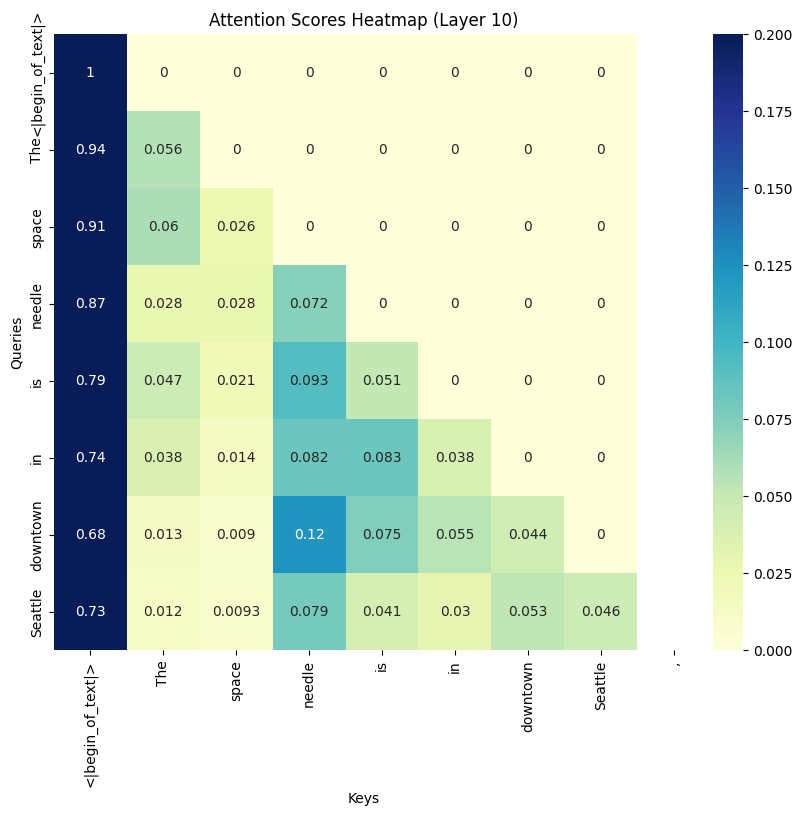

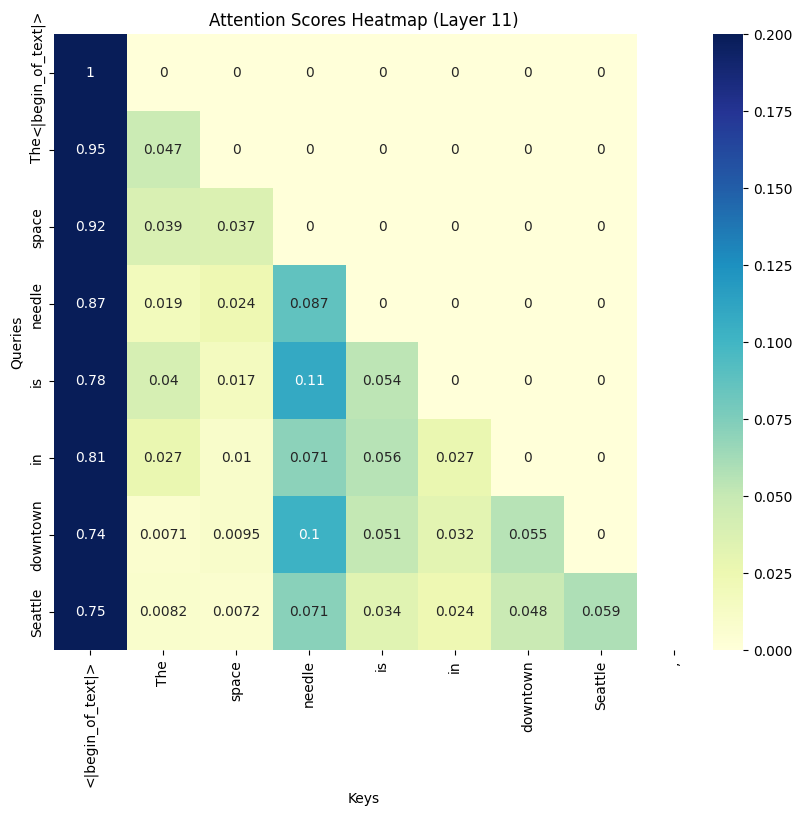

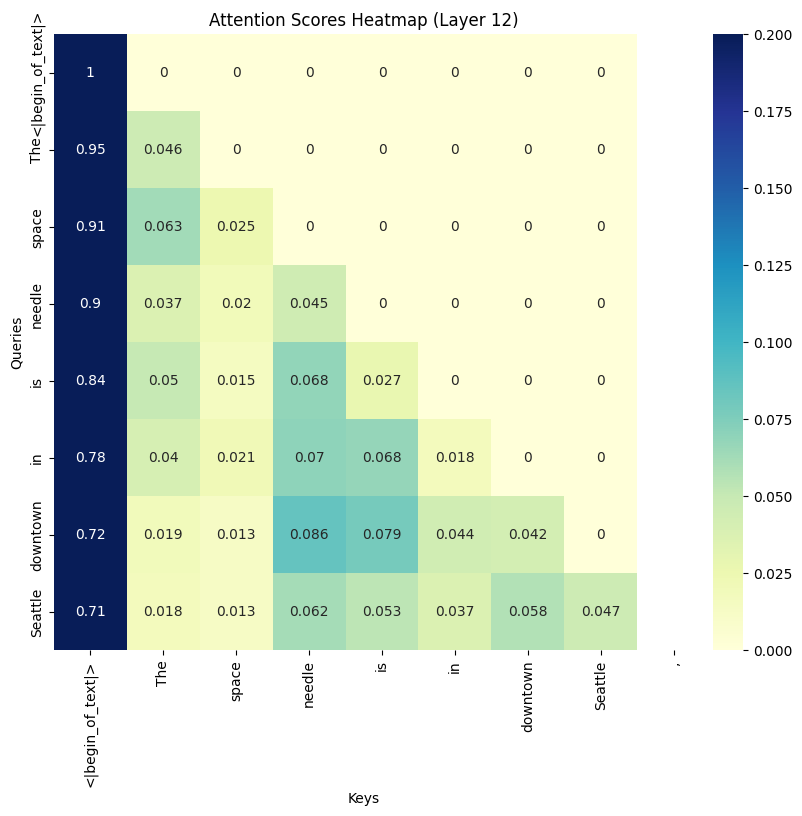

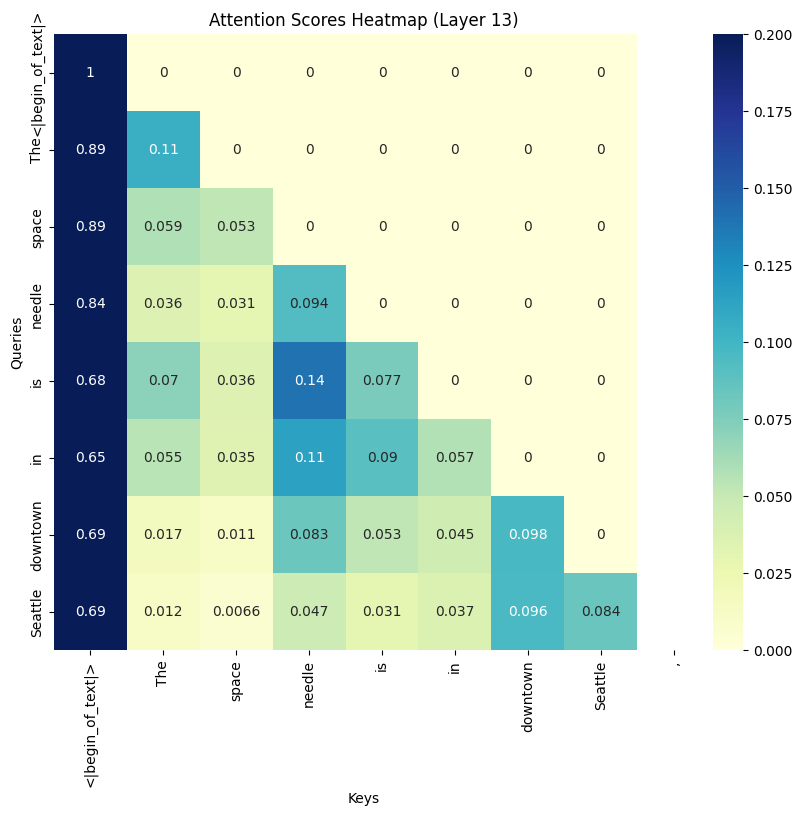

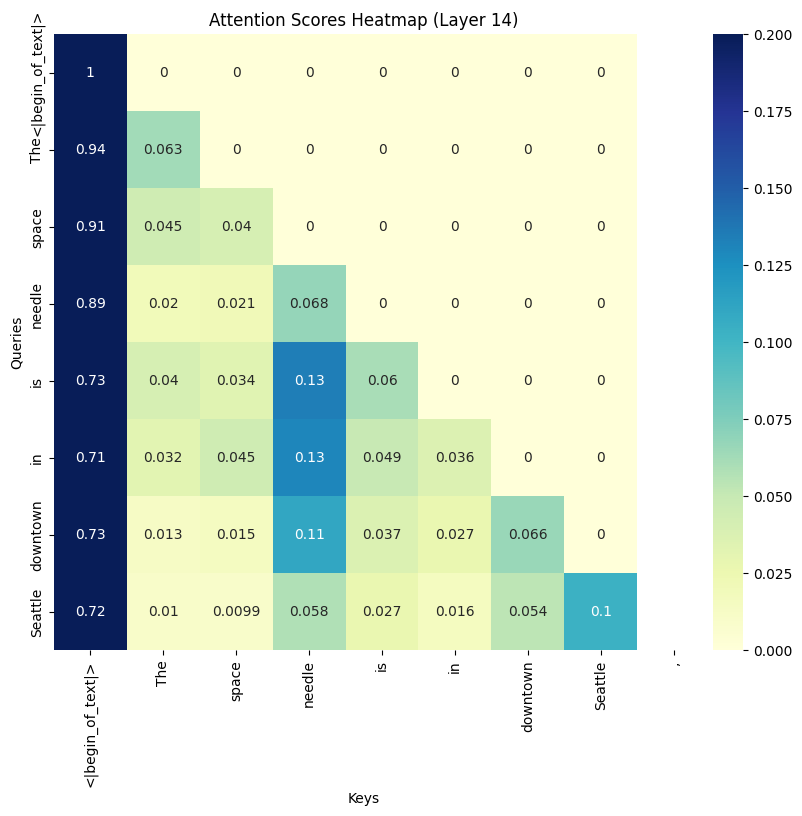

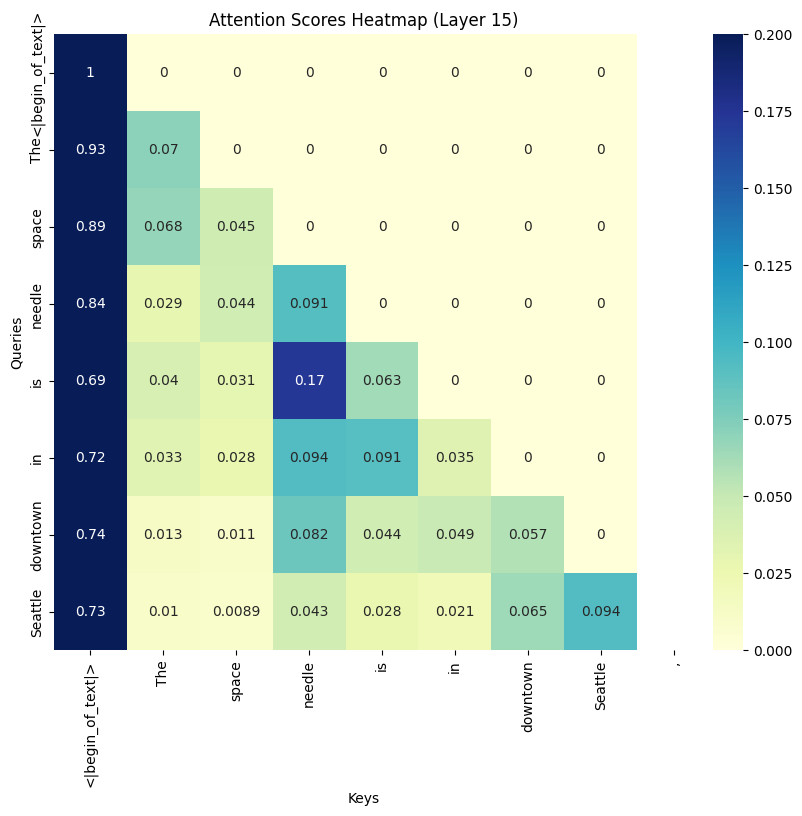

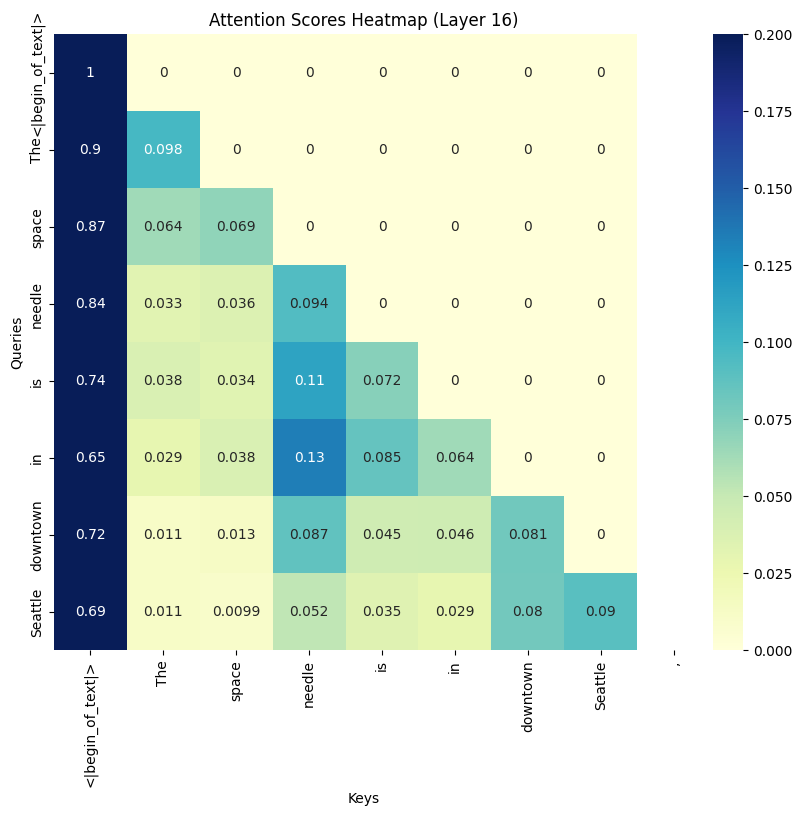

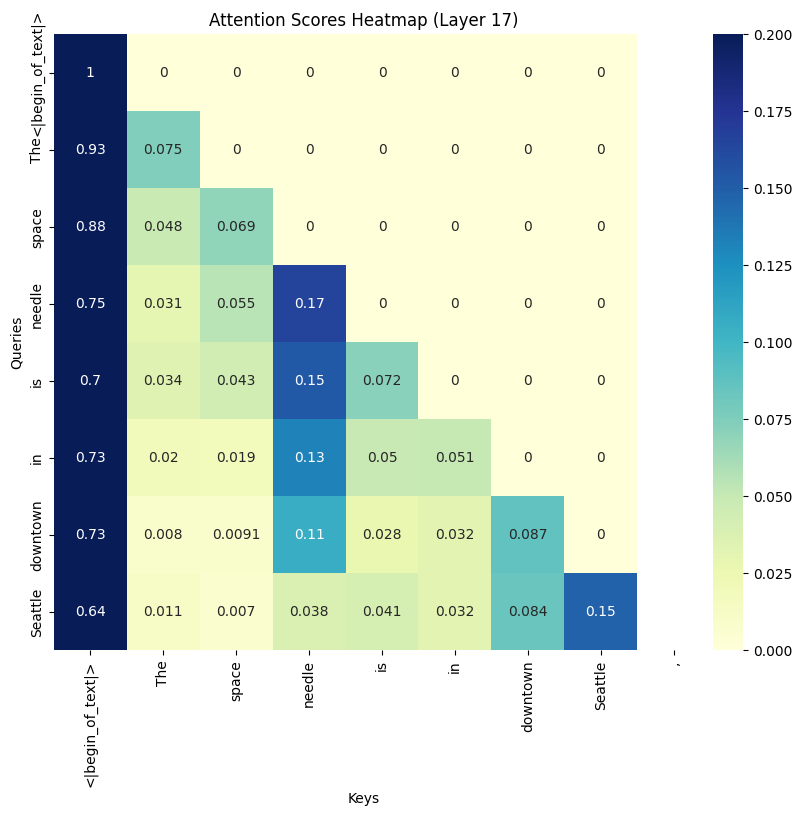

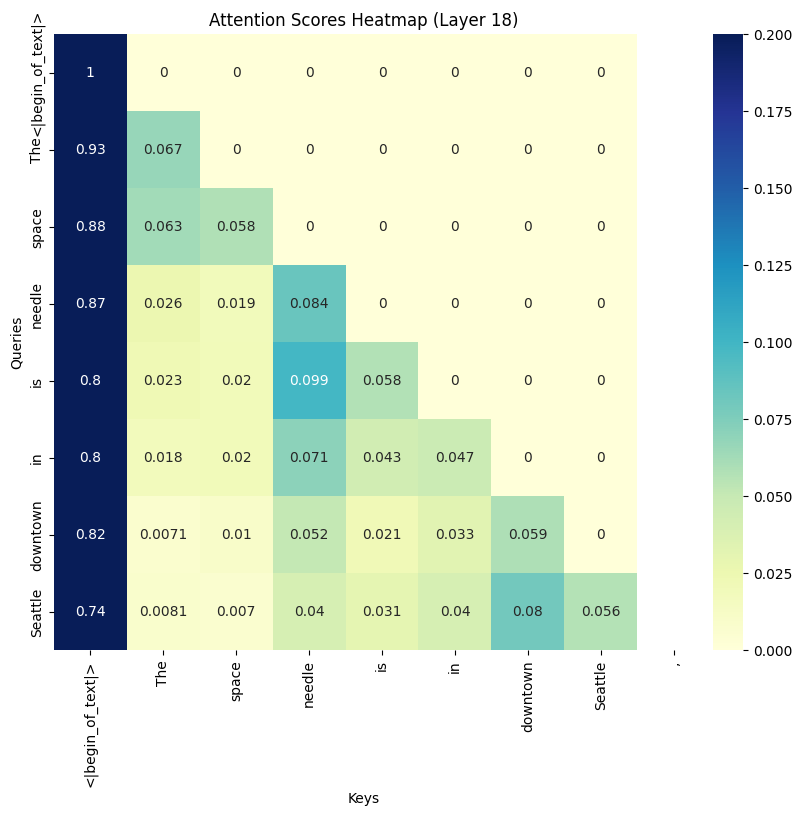

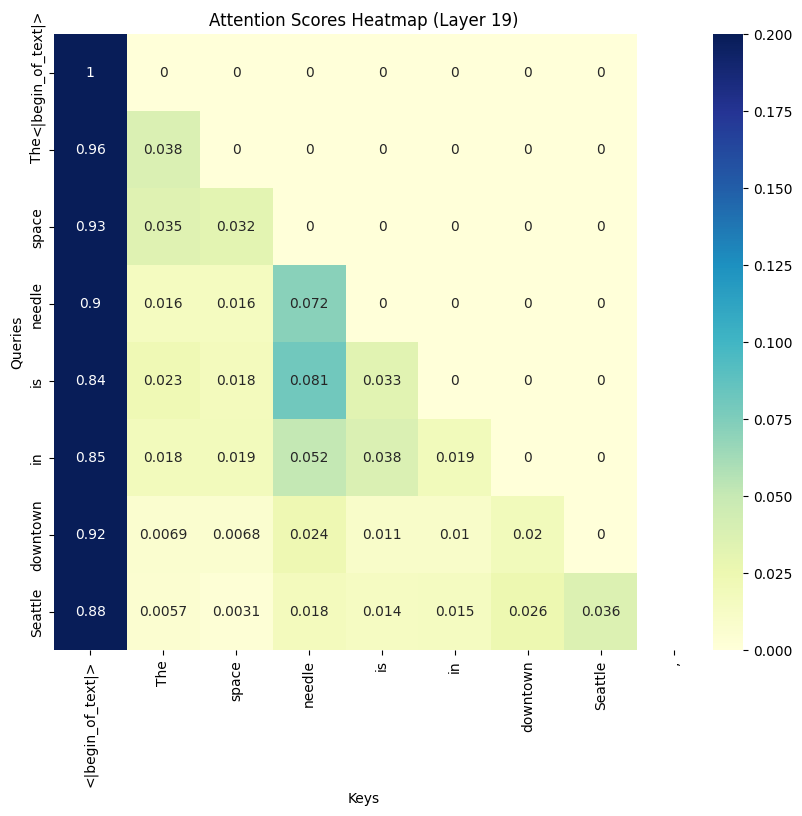

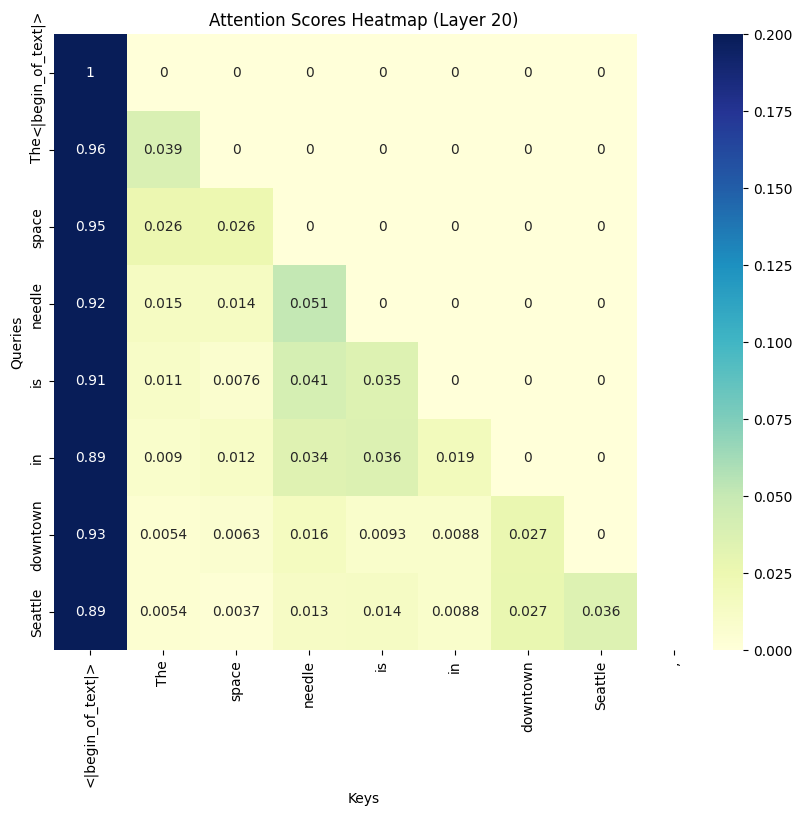

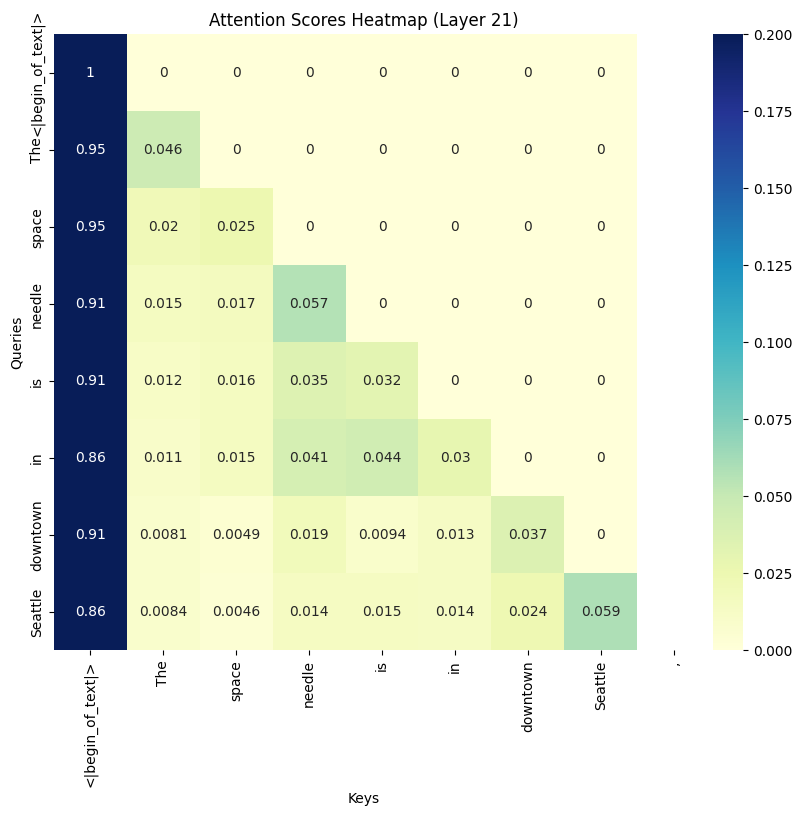

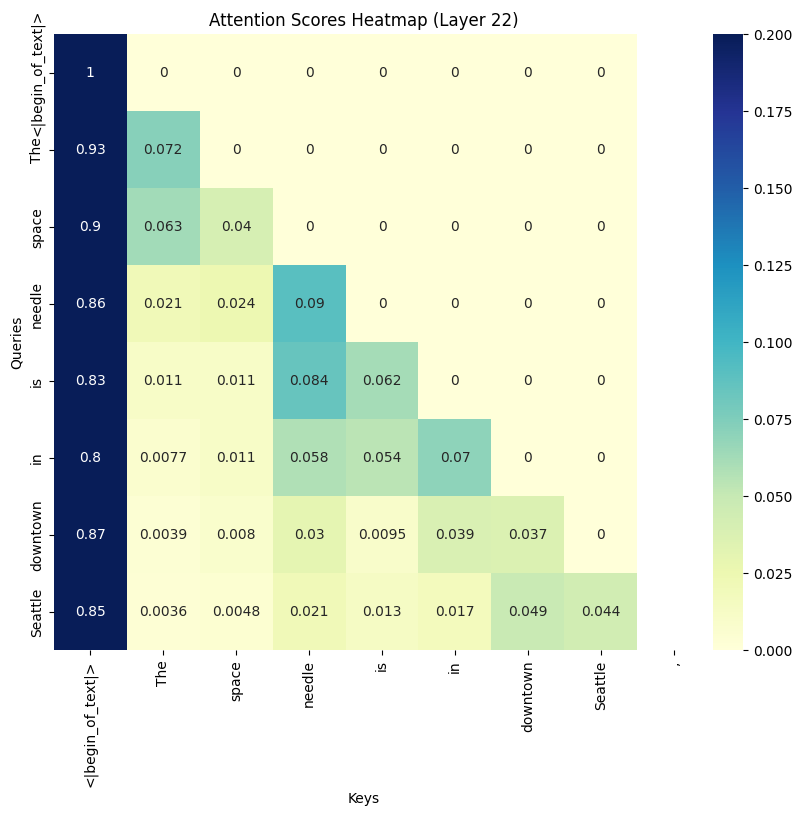

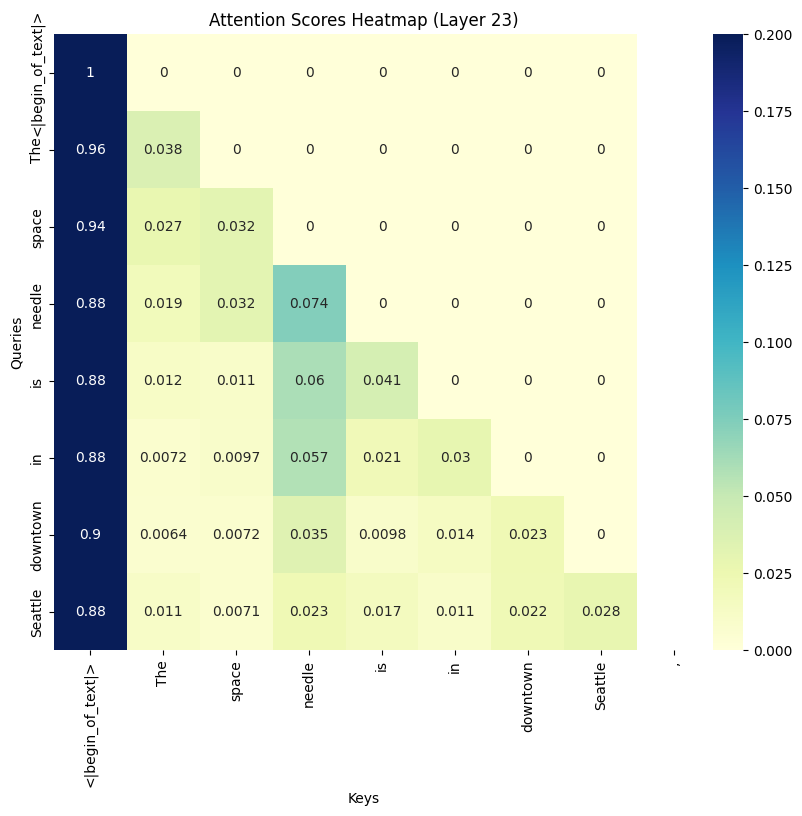

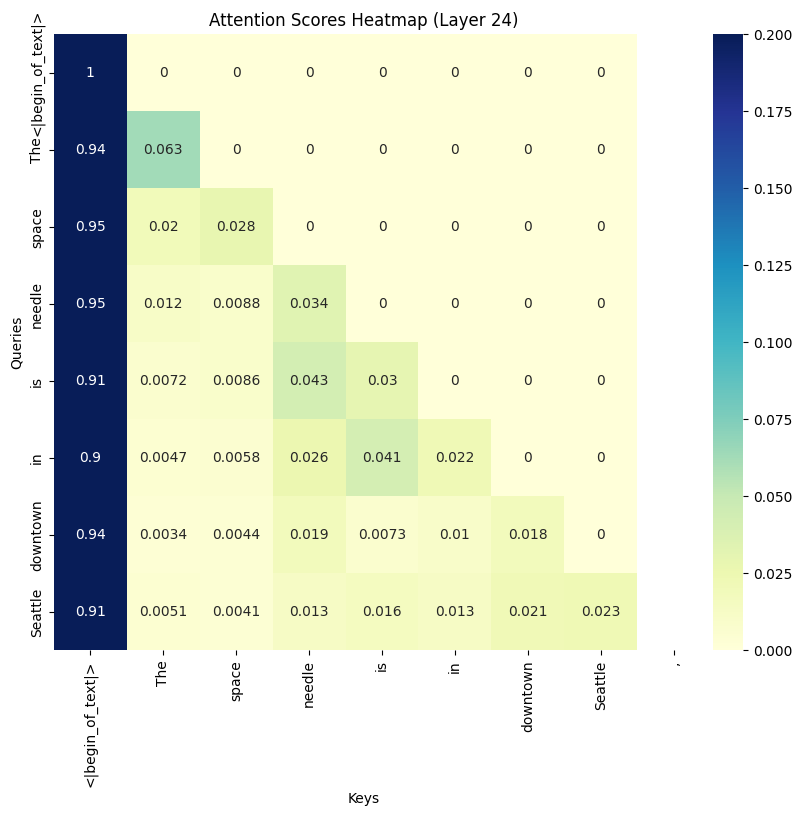

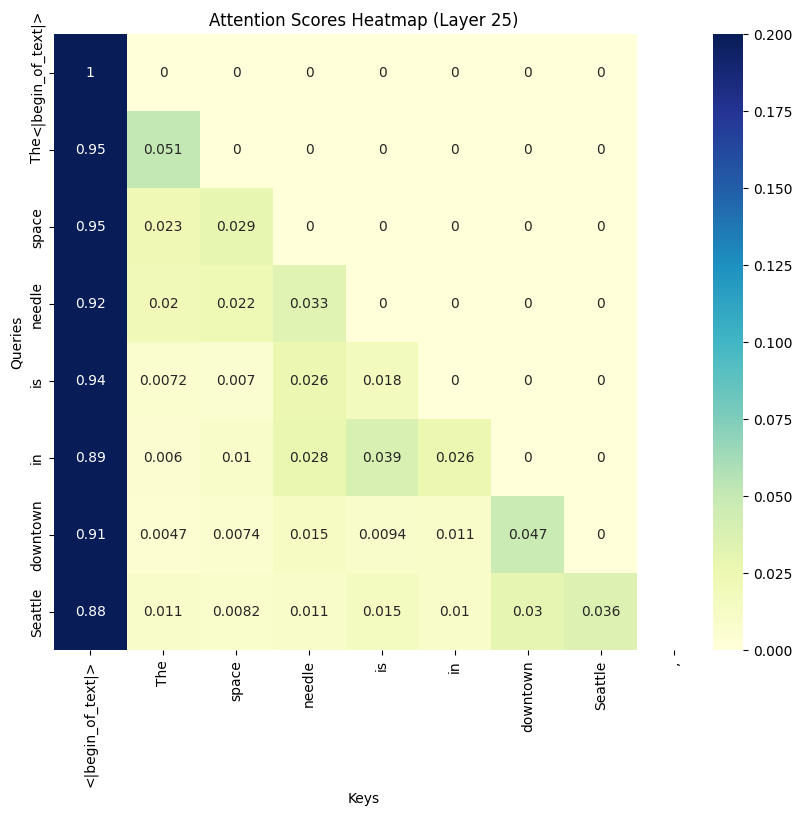

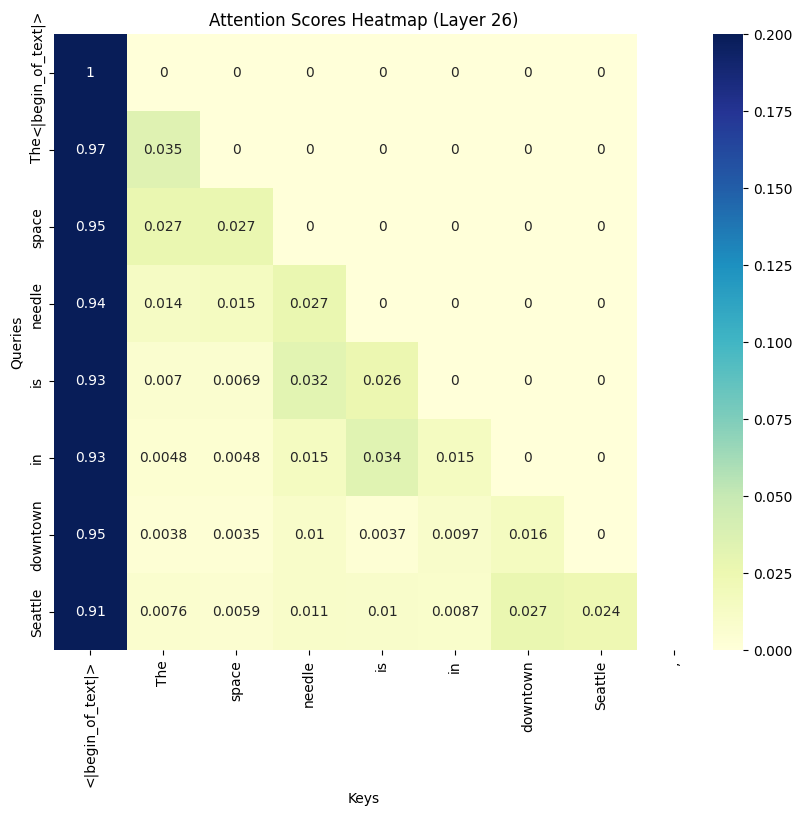

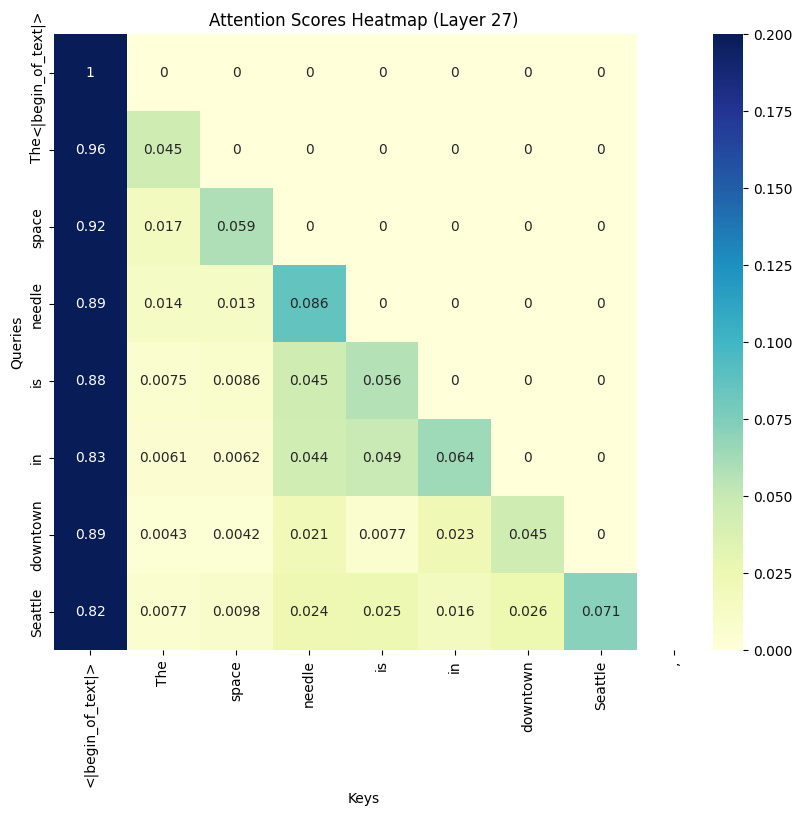

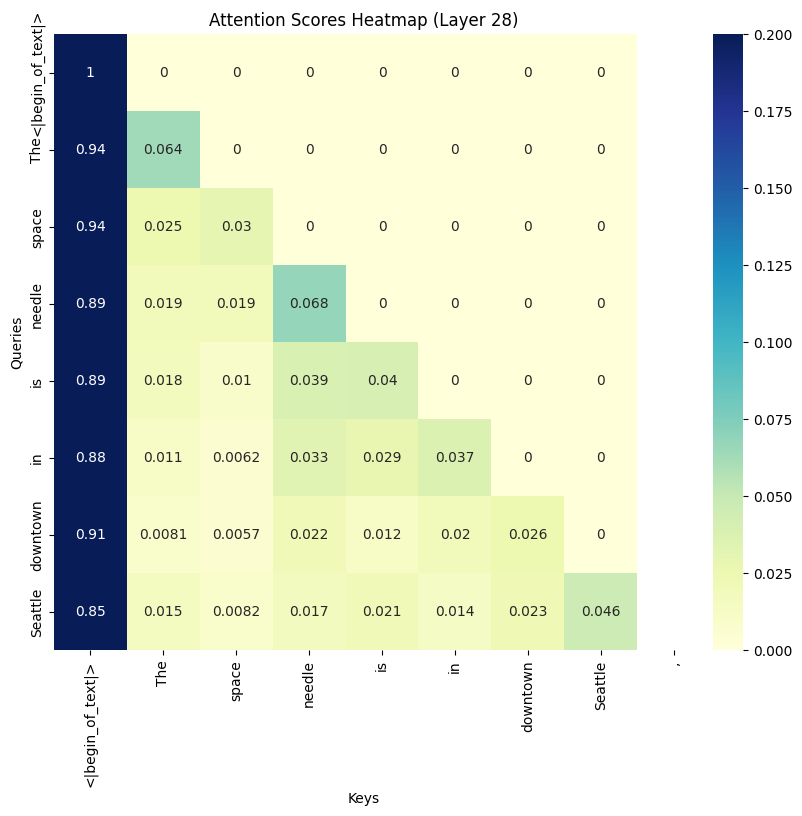

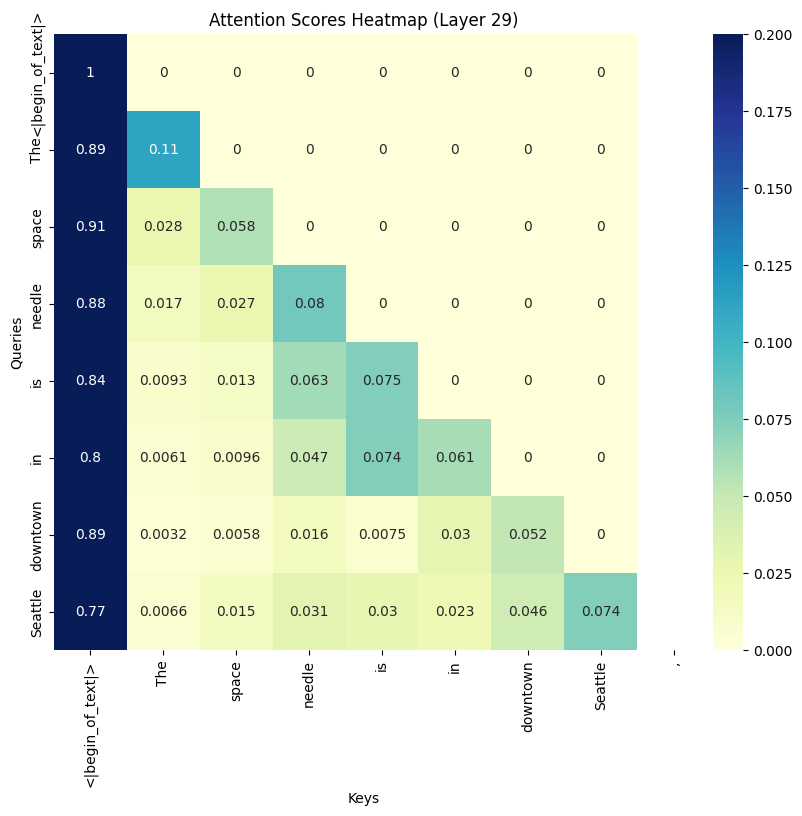

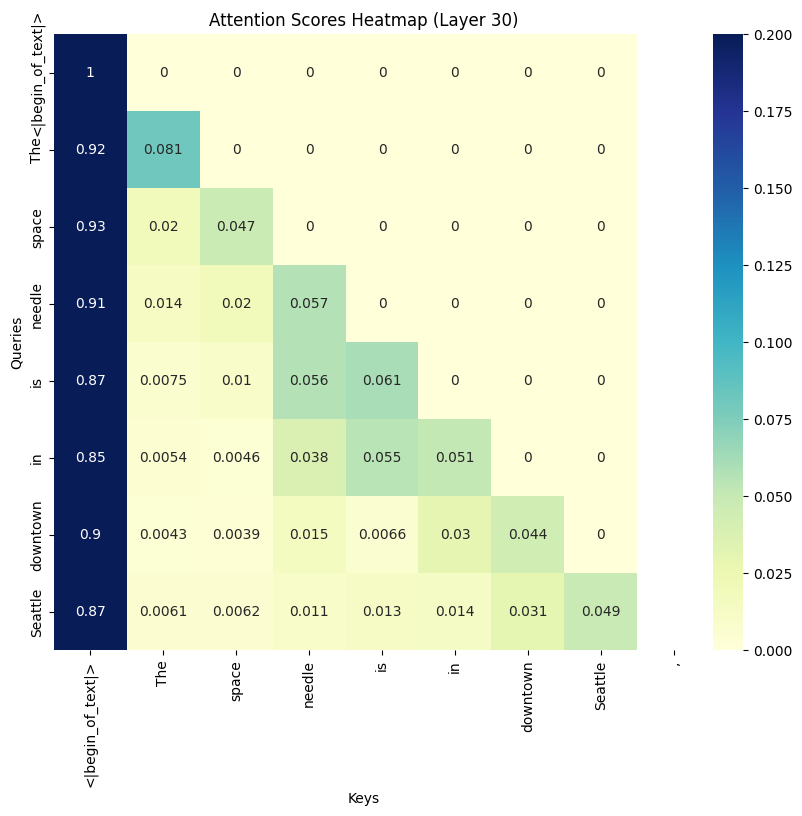

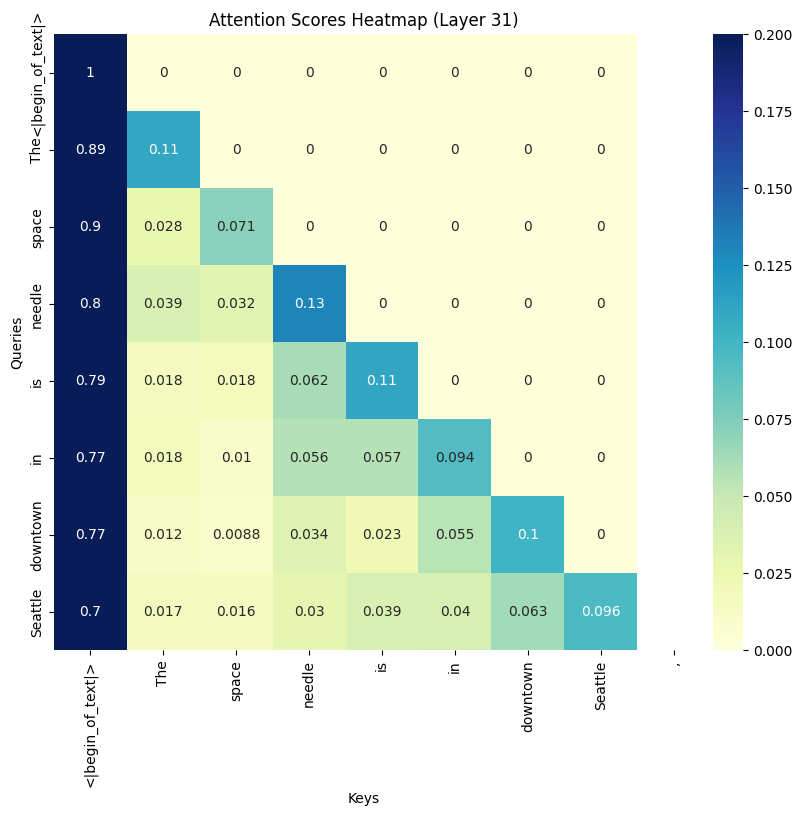

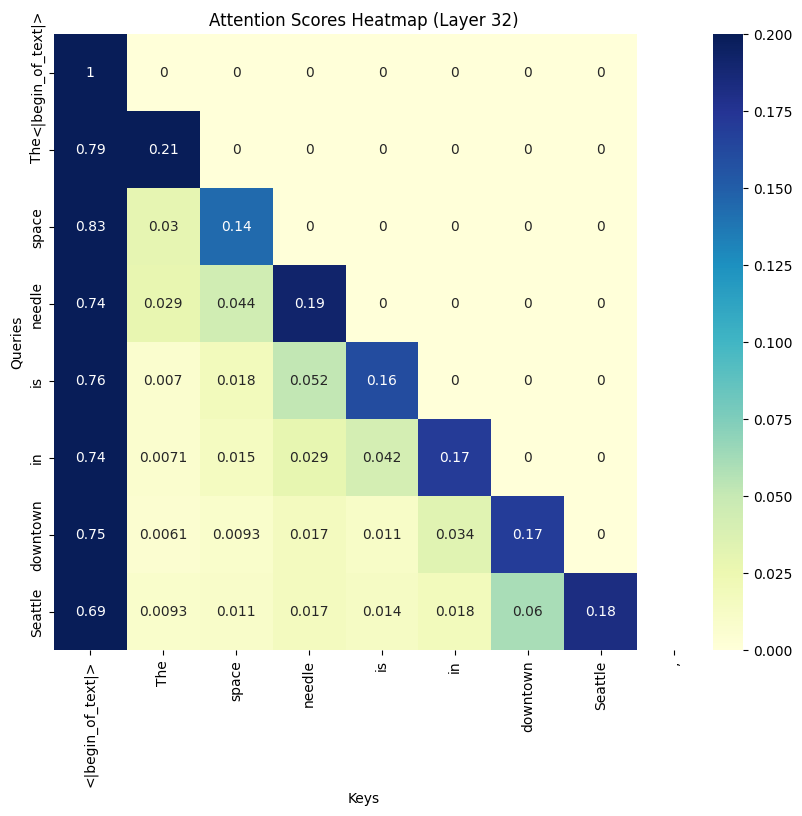

In [39]:

# 输入文本
input_text = "The space needle is in downtown"


# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 2, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 遍历每一层的注意力值
for layer_index in range(len(attentions[0])):
    all_attention = []
    max_seq_length = max([step[layer_index][0][0].shape[-1] for step in attentions])

    for step in attentions:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        all_attention.append(attn)

    # 将注意力值拼接成一个完整的矩阵
    complete_attention = np.concatenate(all_attention, axis=0)

    # 创建热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
    plt.title(f'Attention Scores Heatmap (Layer {layer_index + 1})')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.show()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


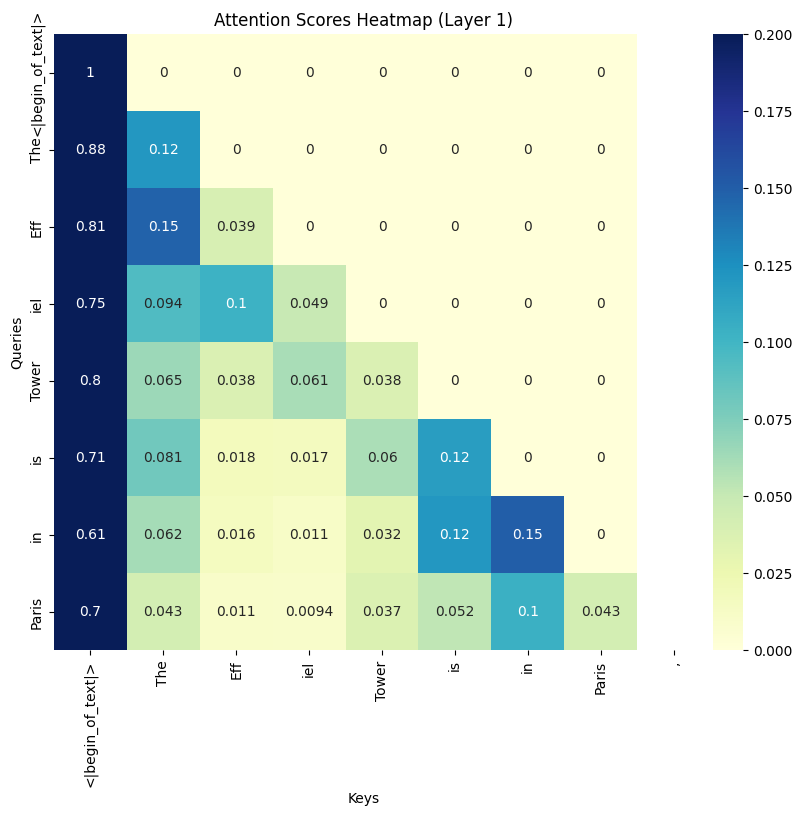

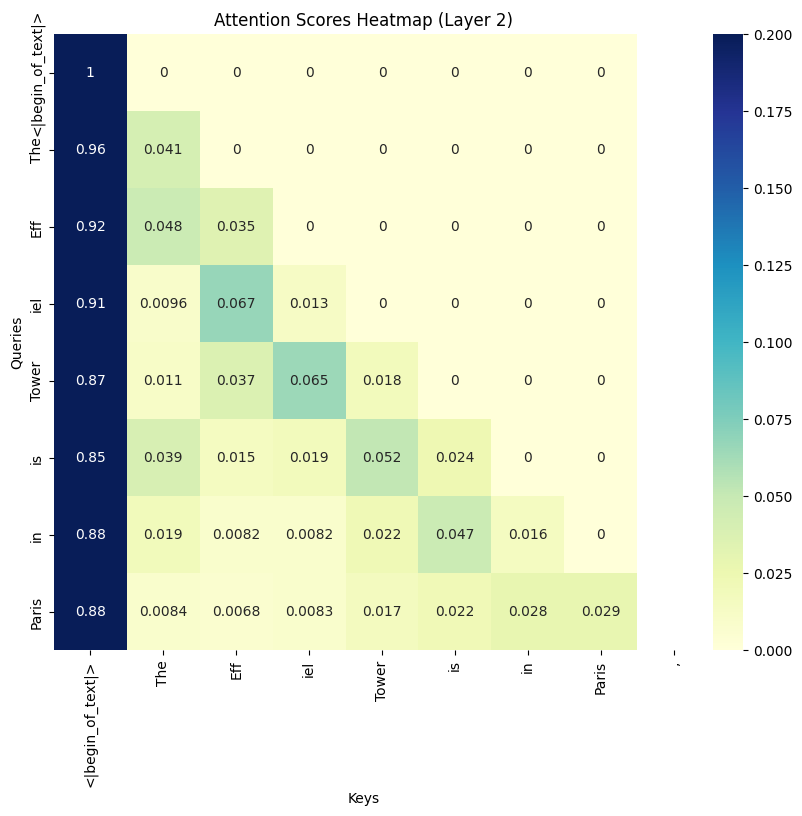

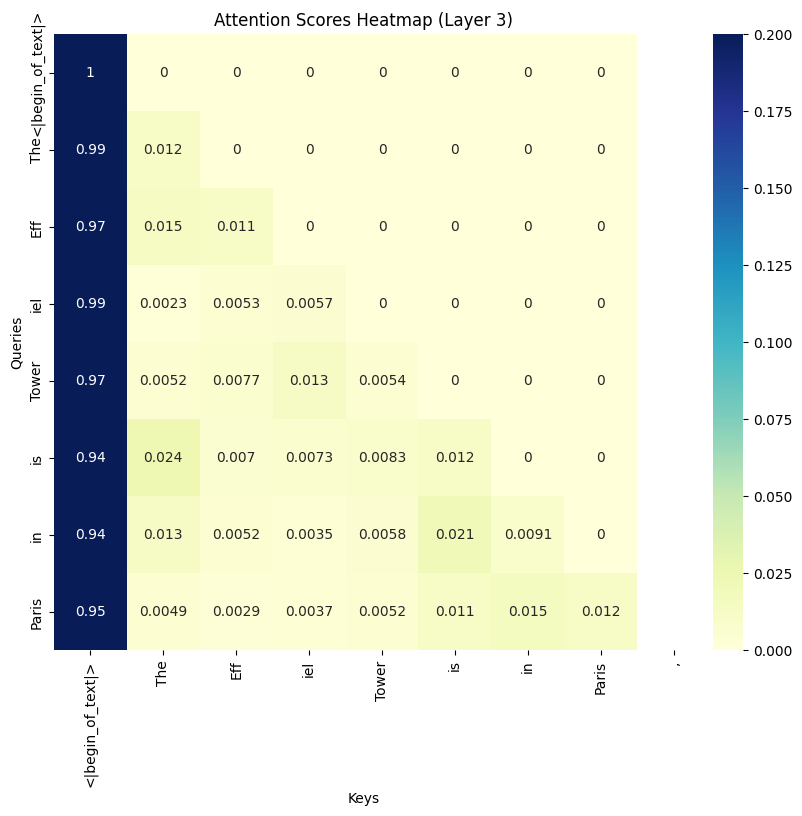

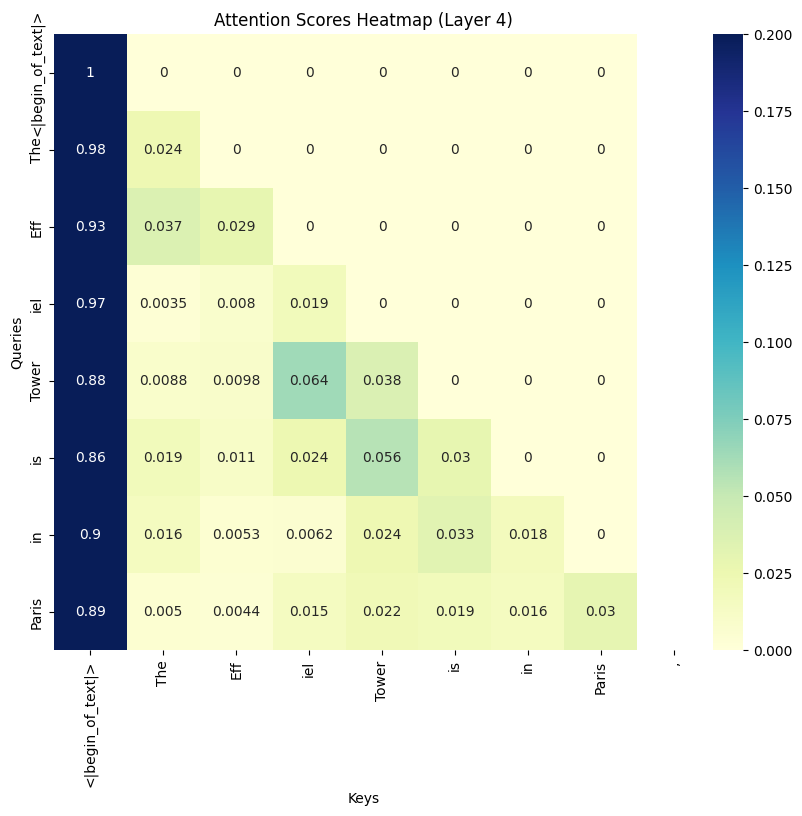

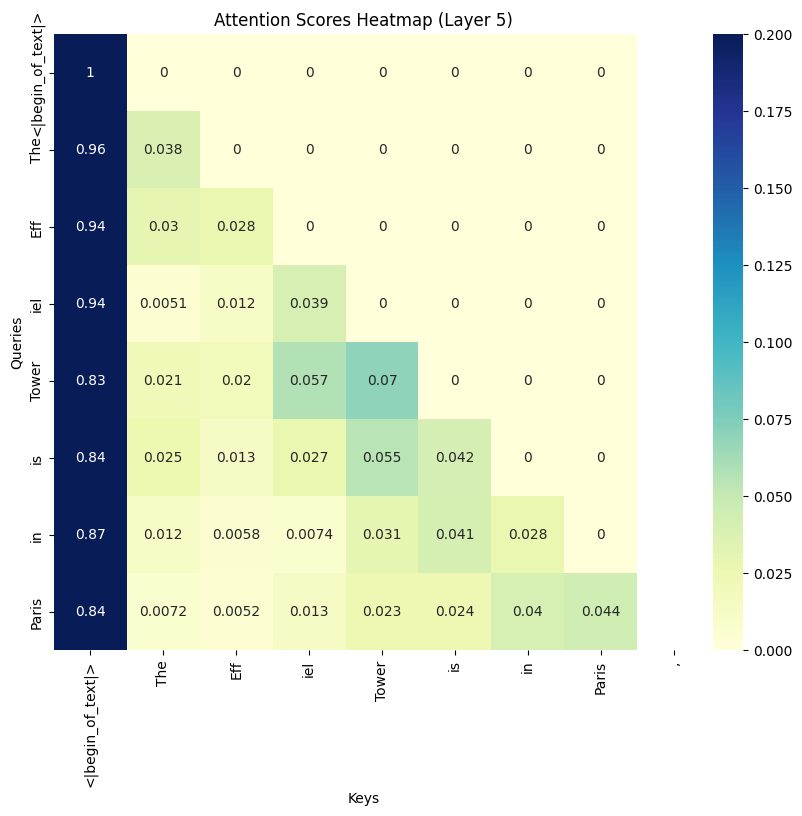

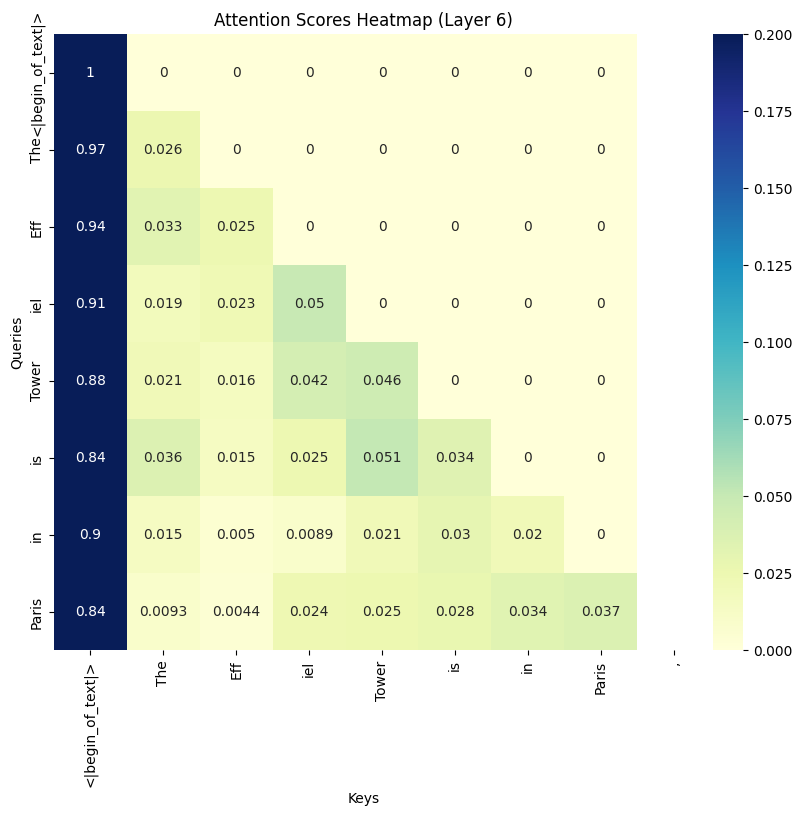

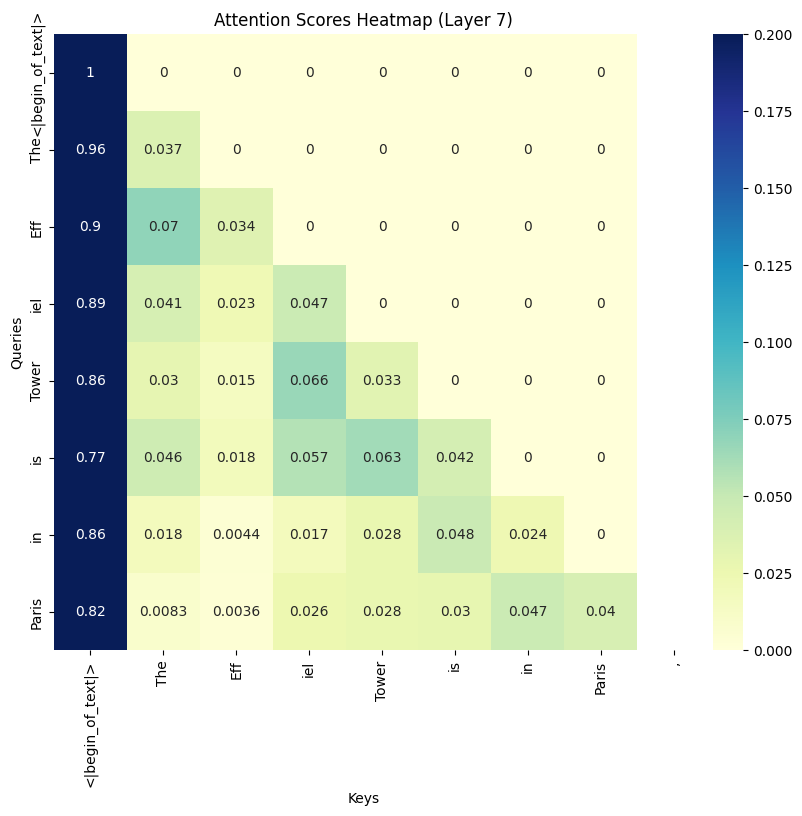

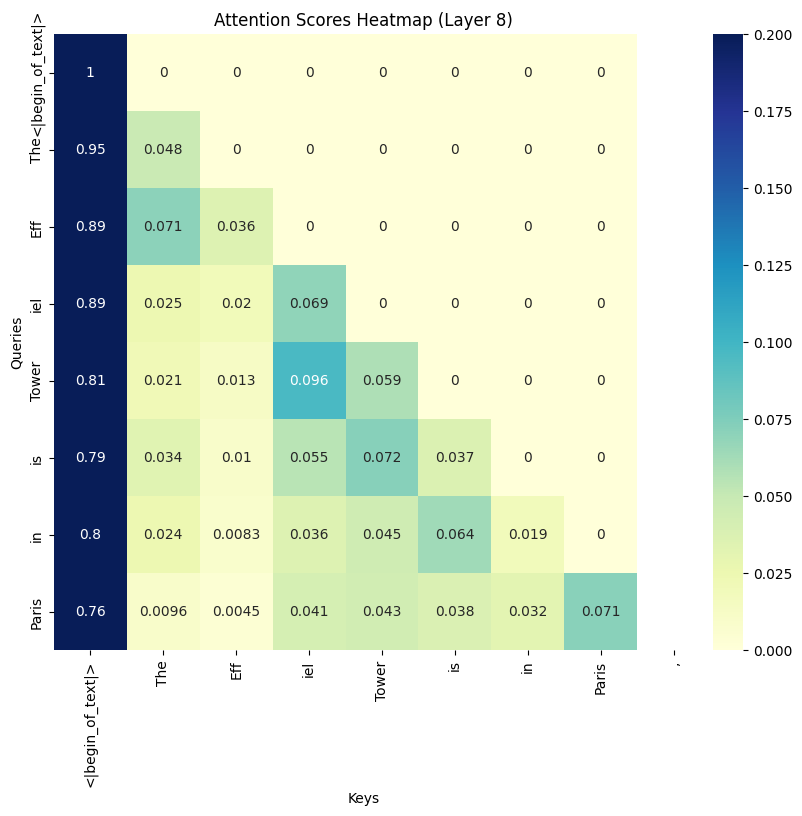

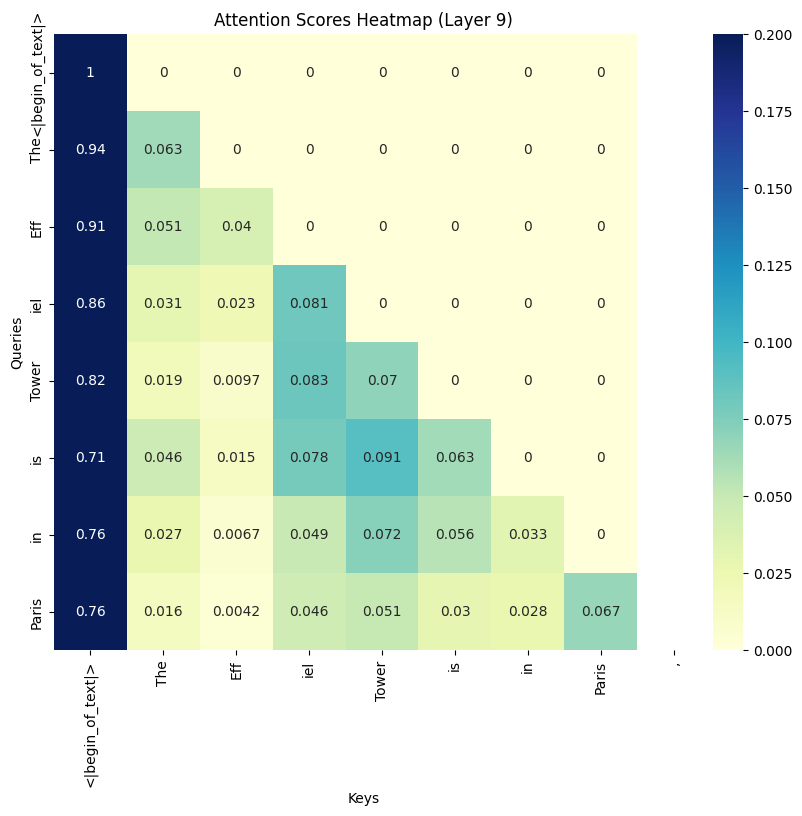

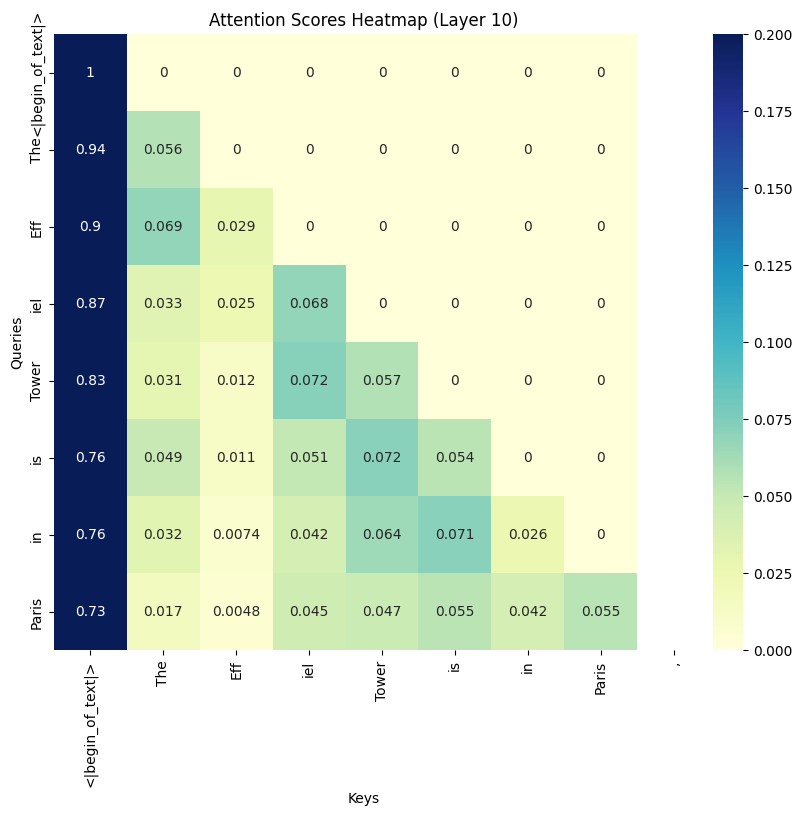

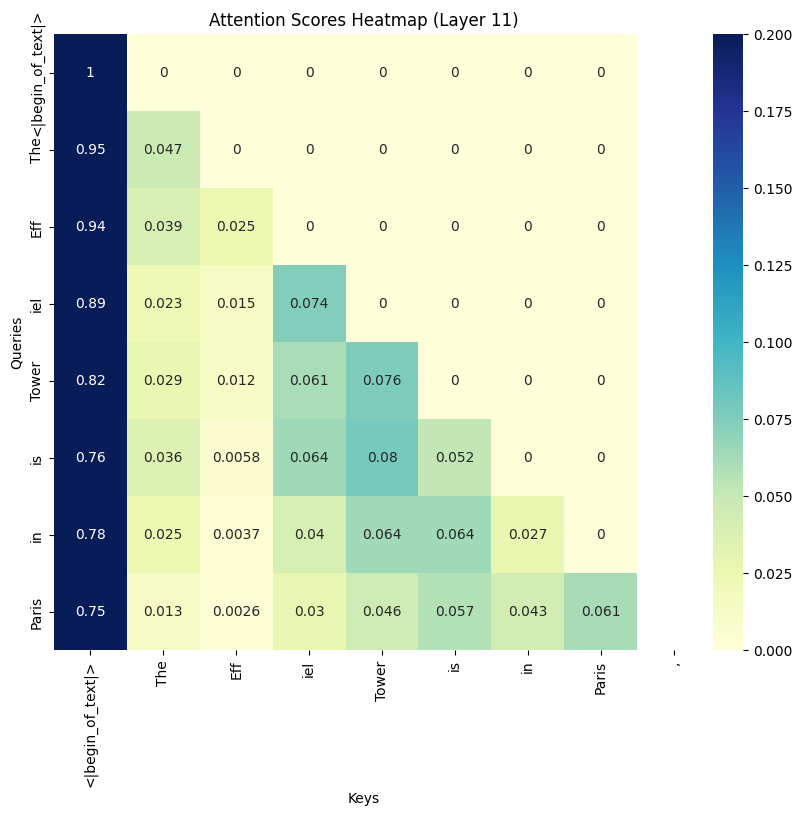

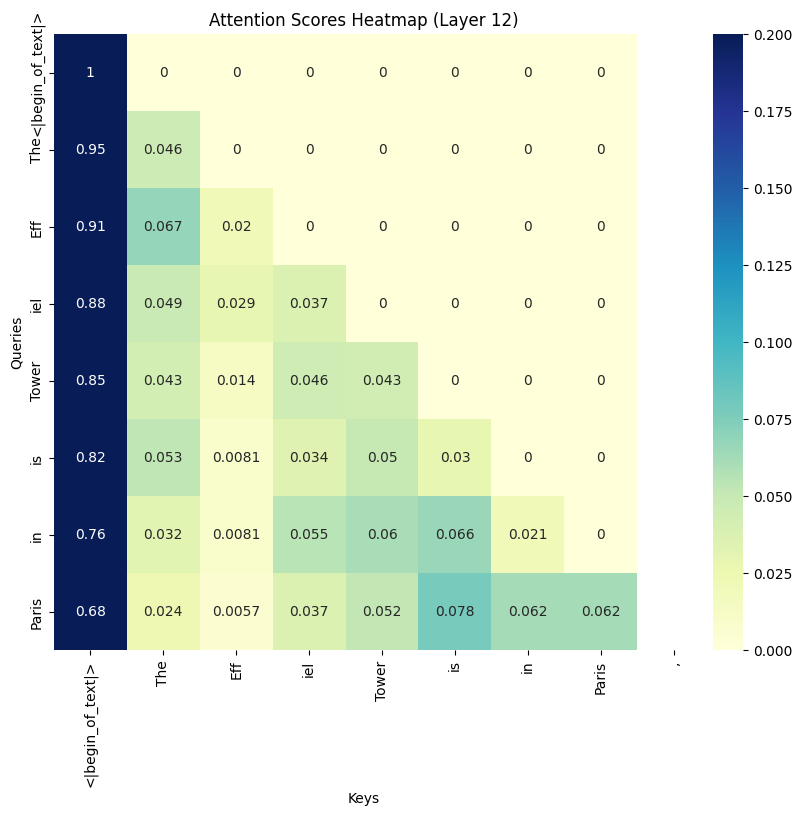

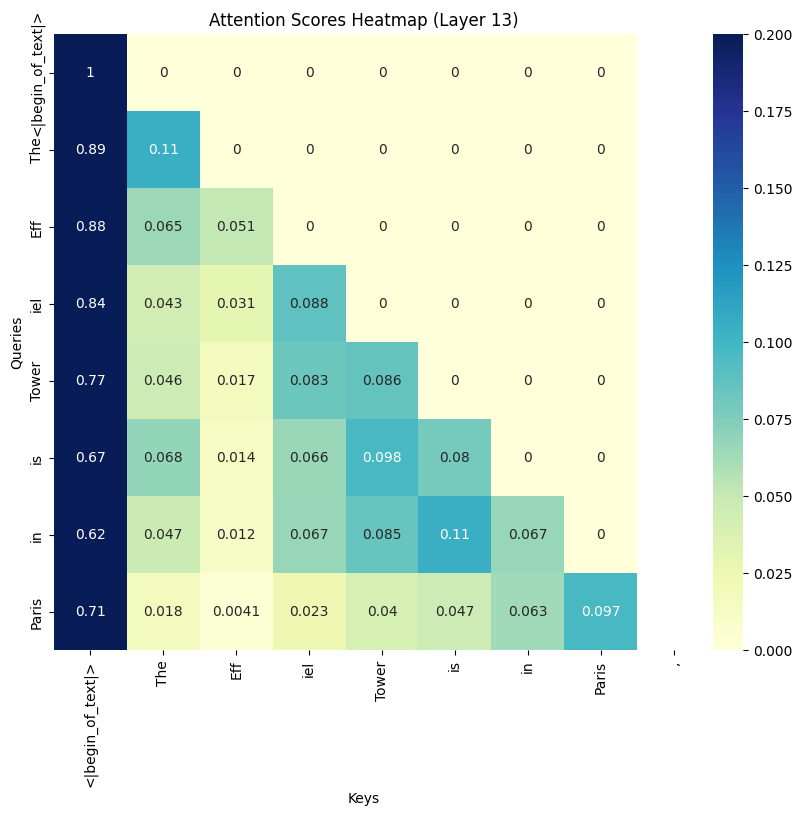

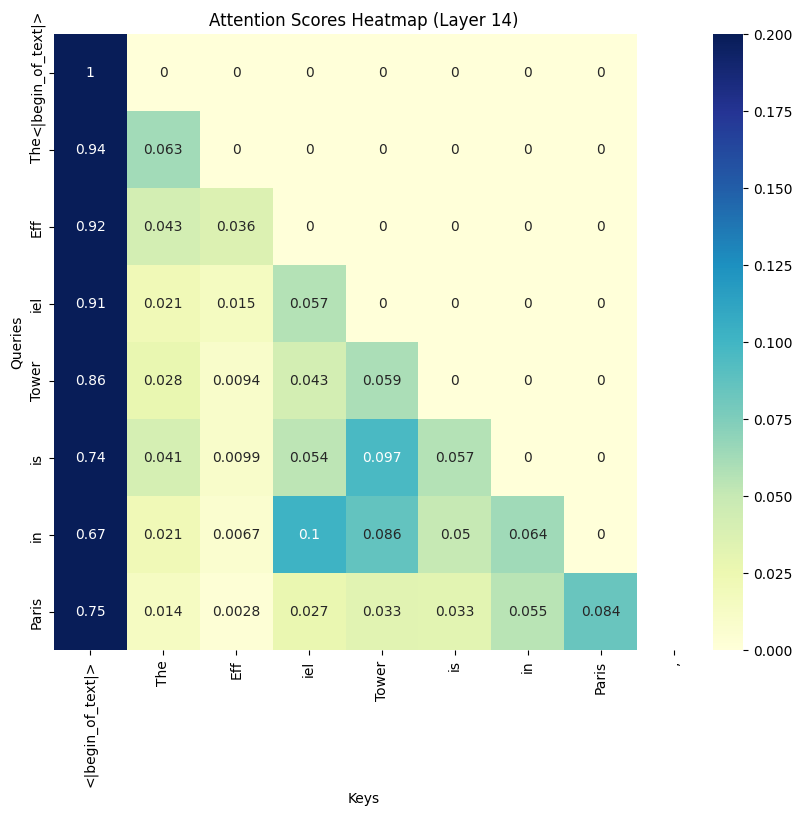

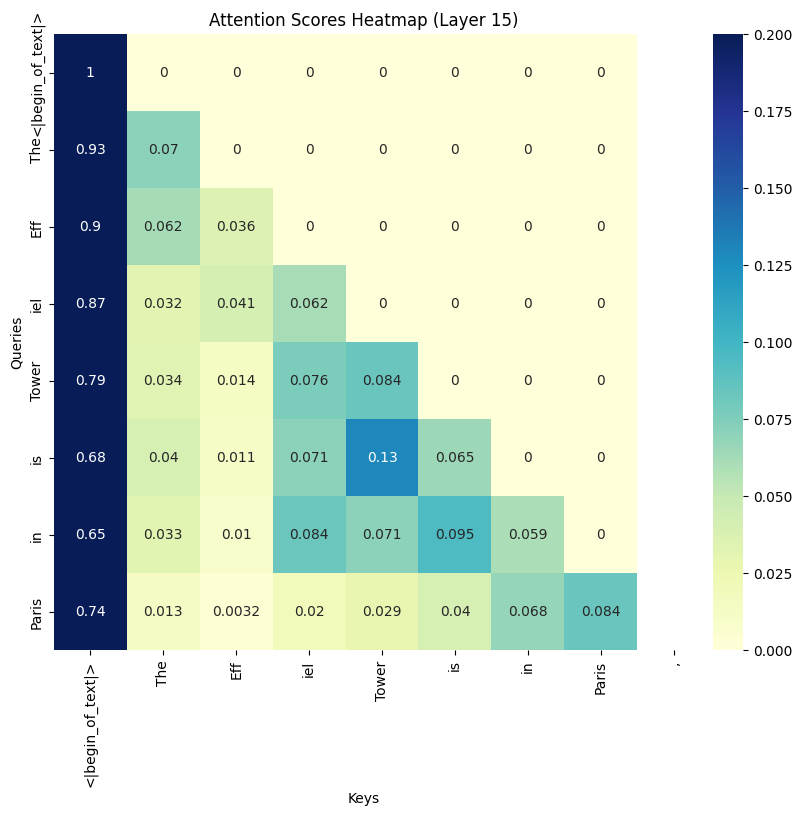

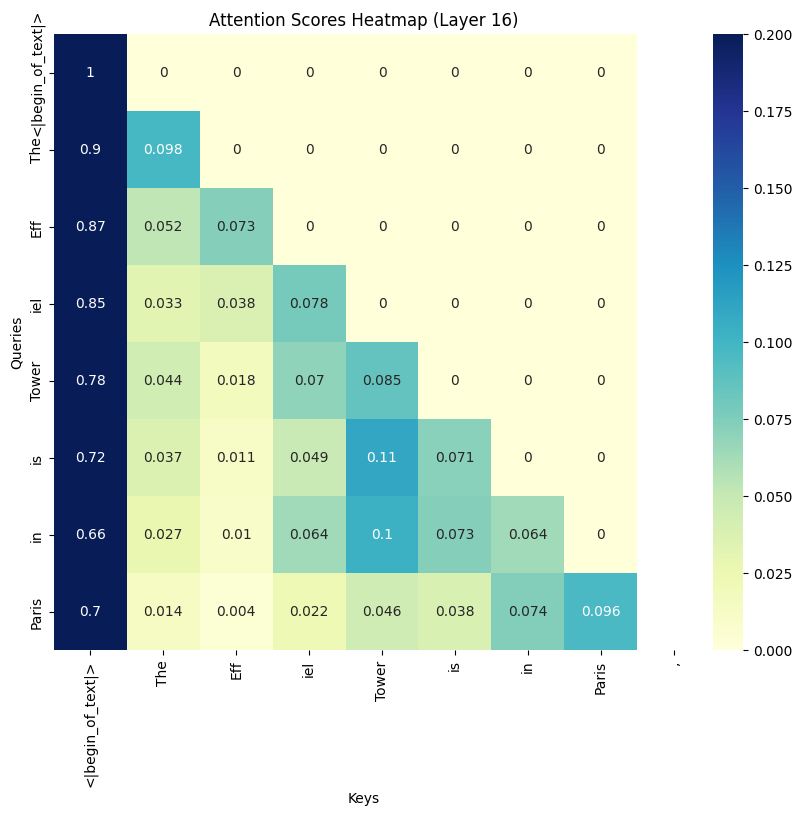

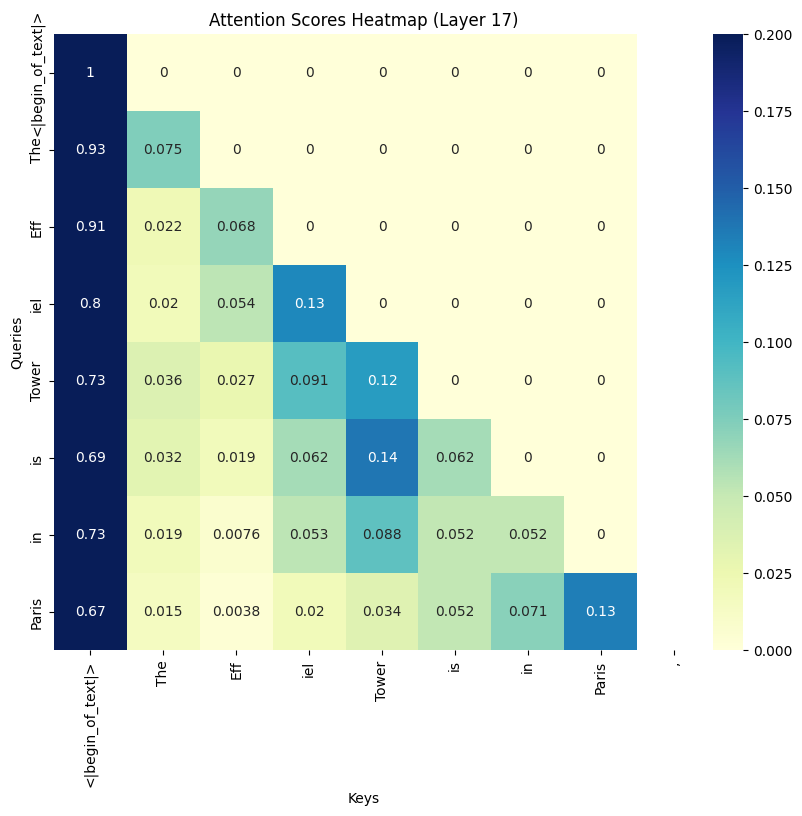

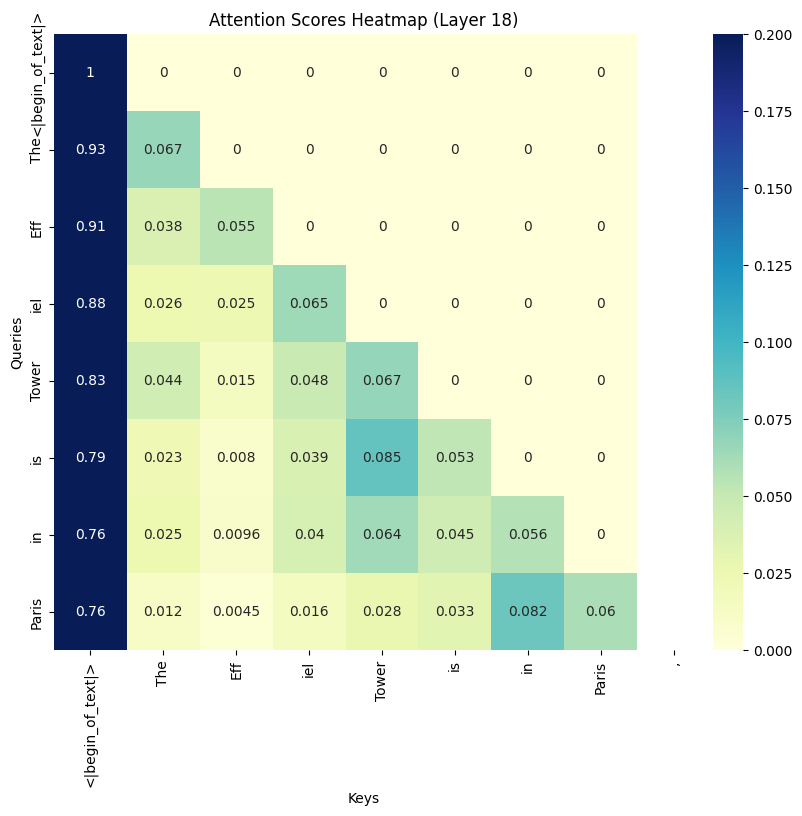

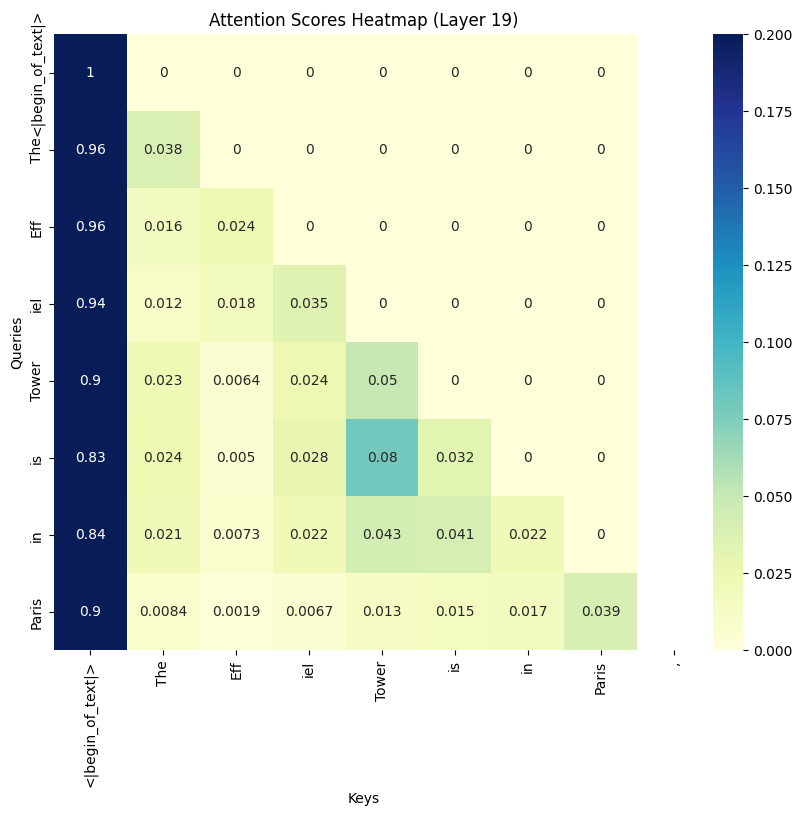

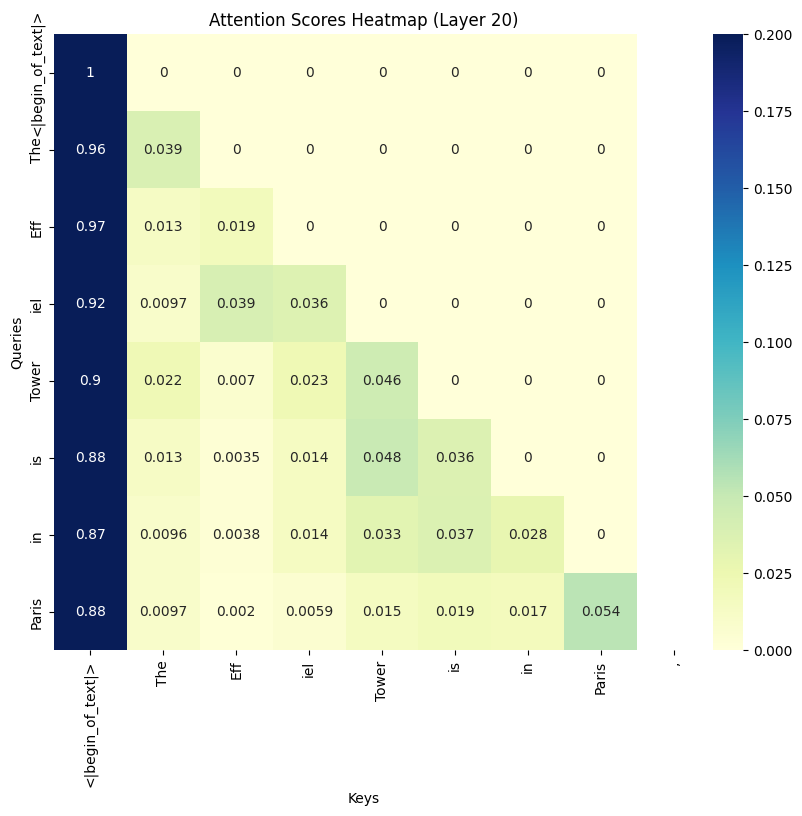

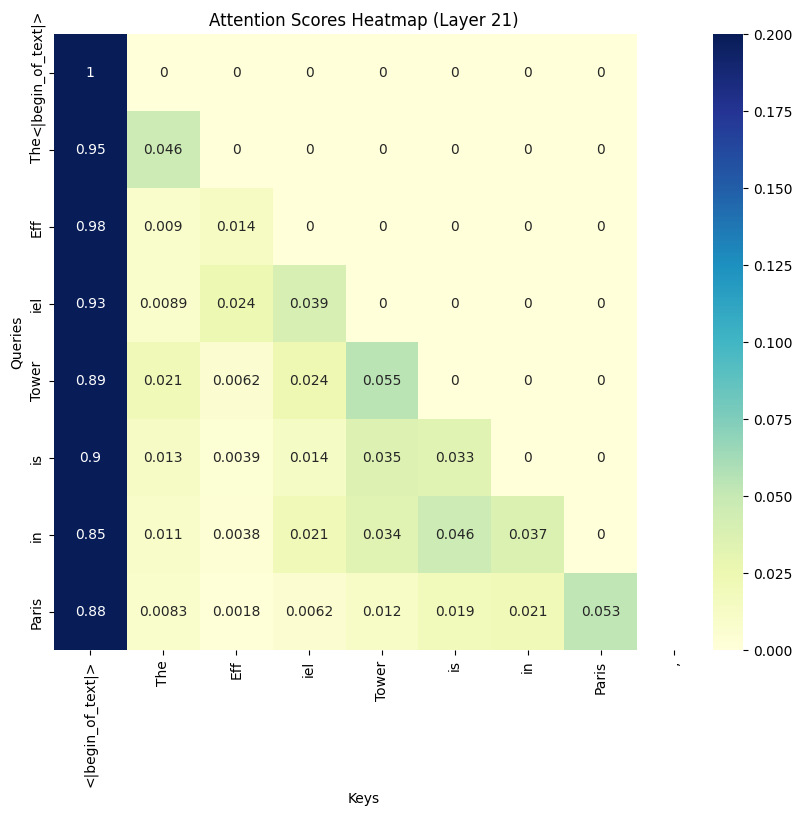

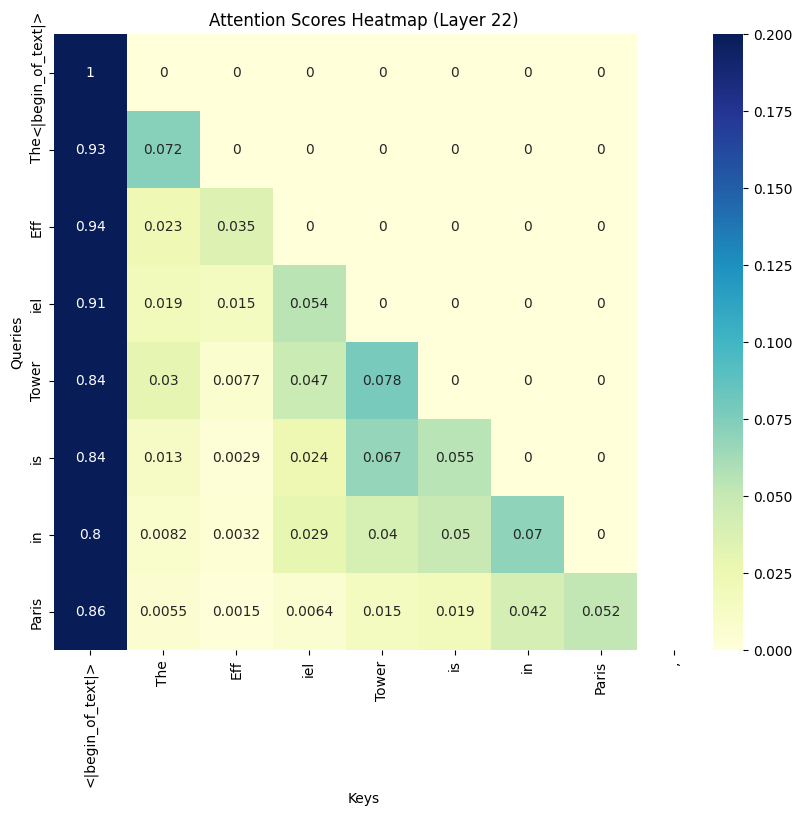

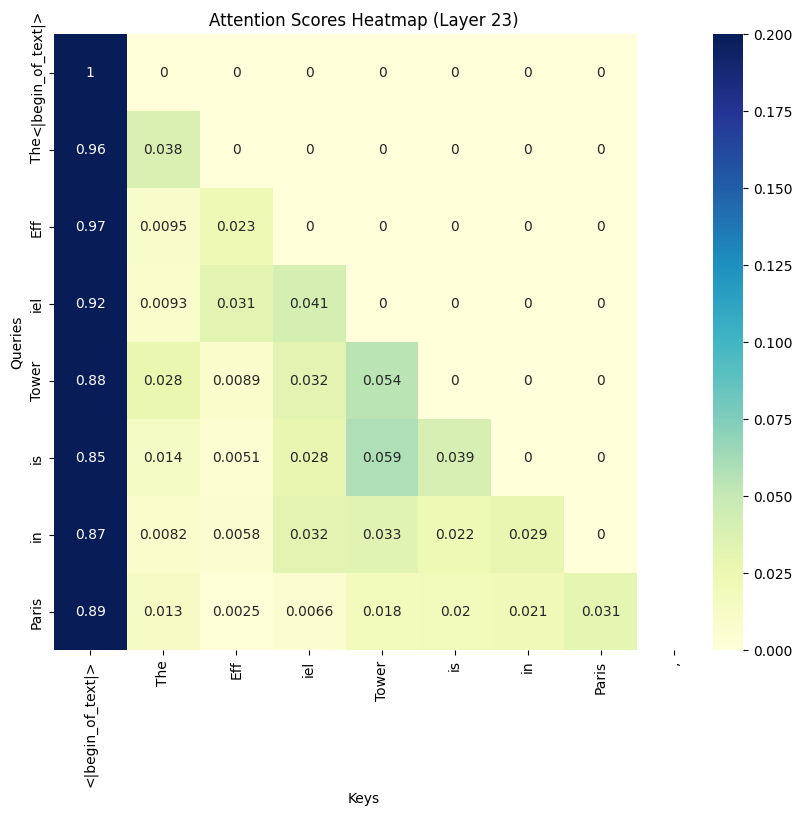

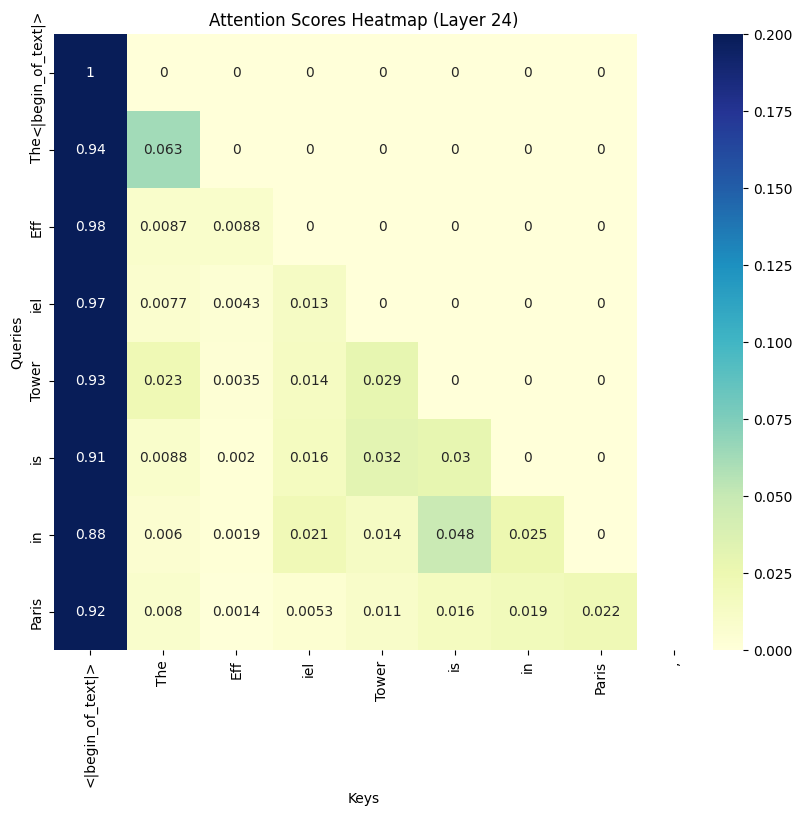

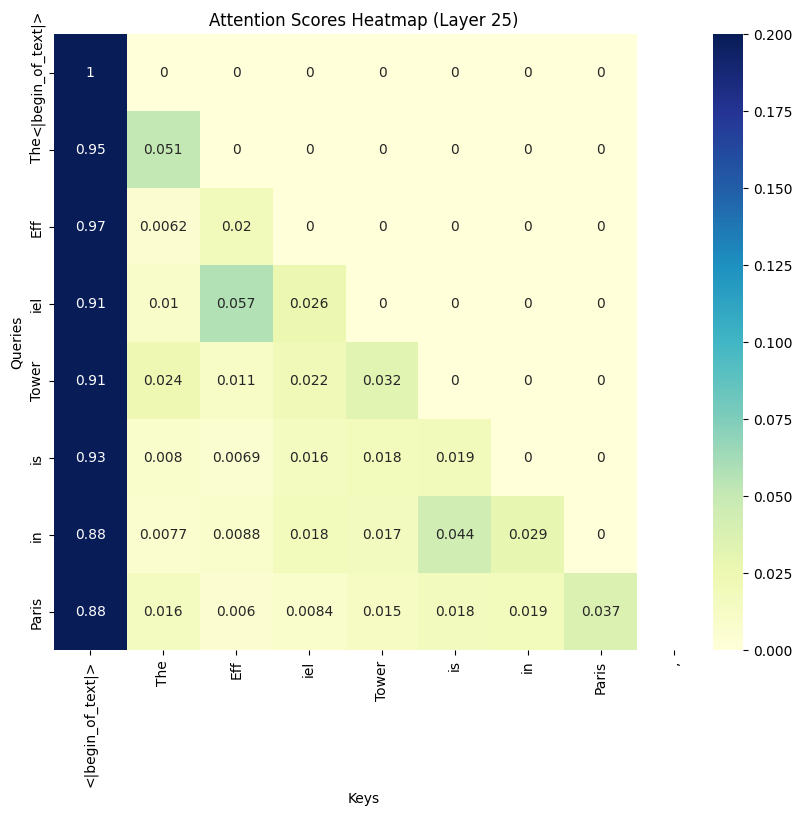

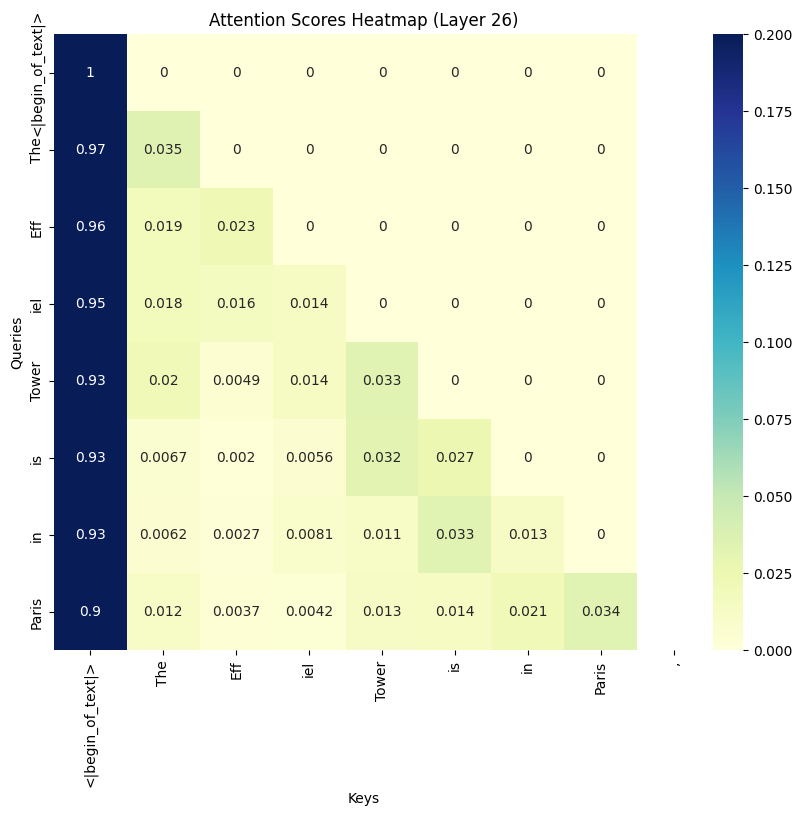

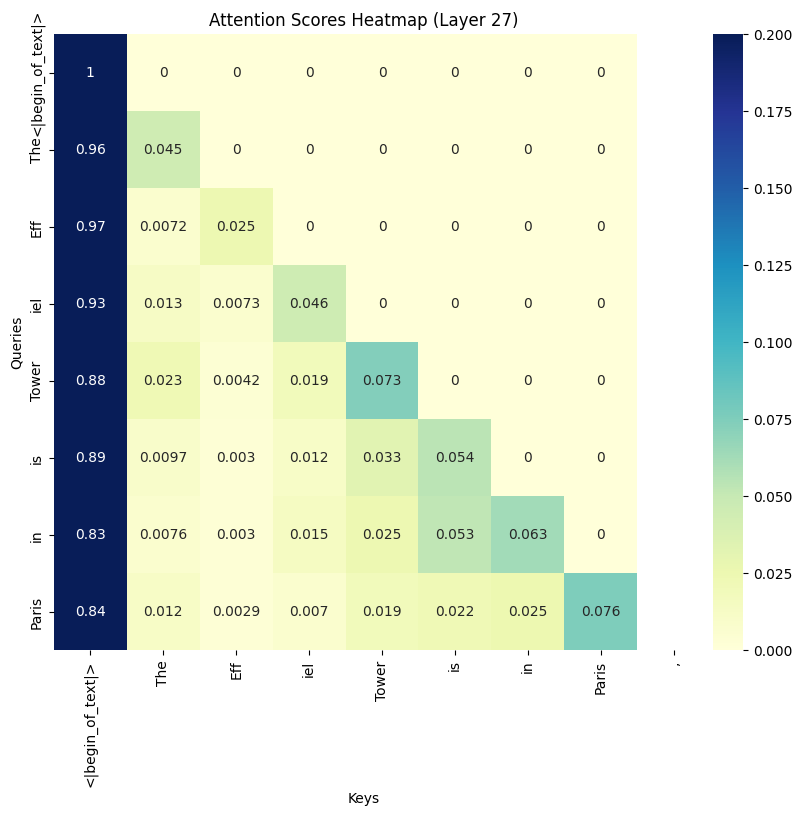

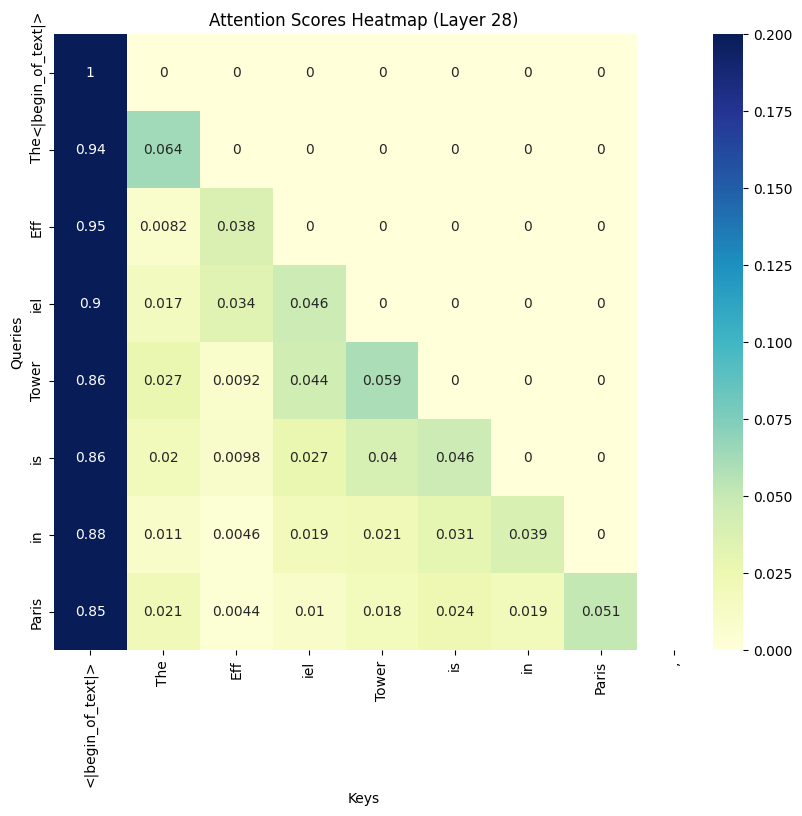

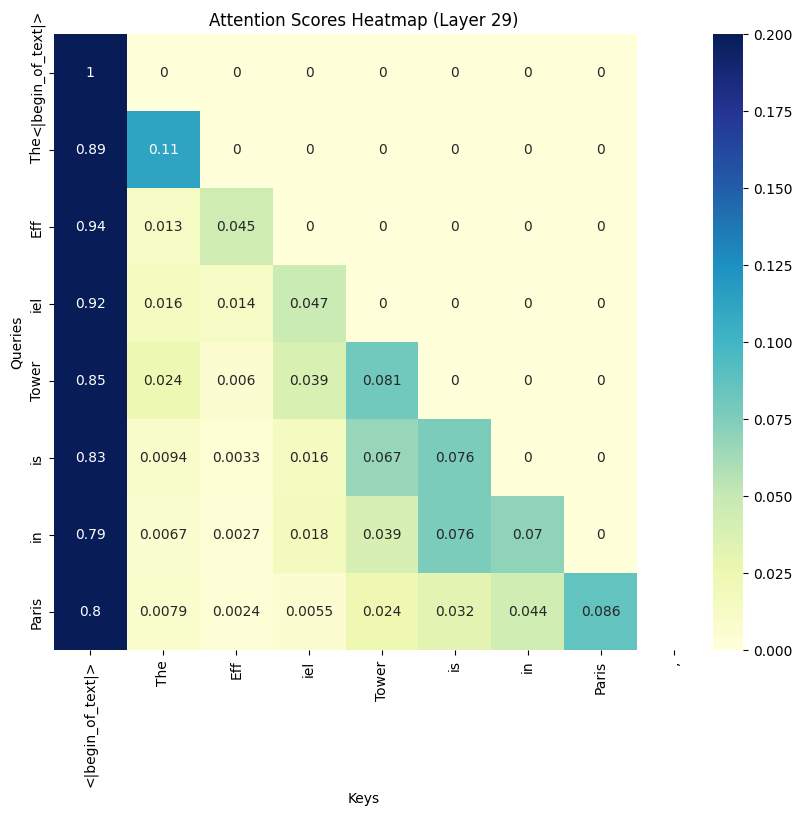

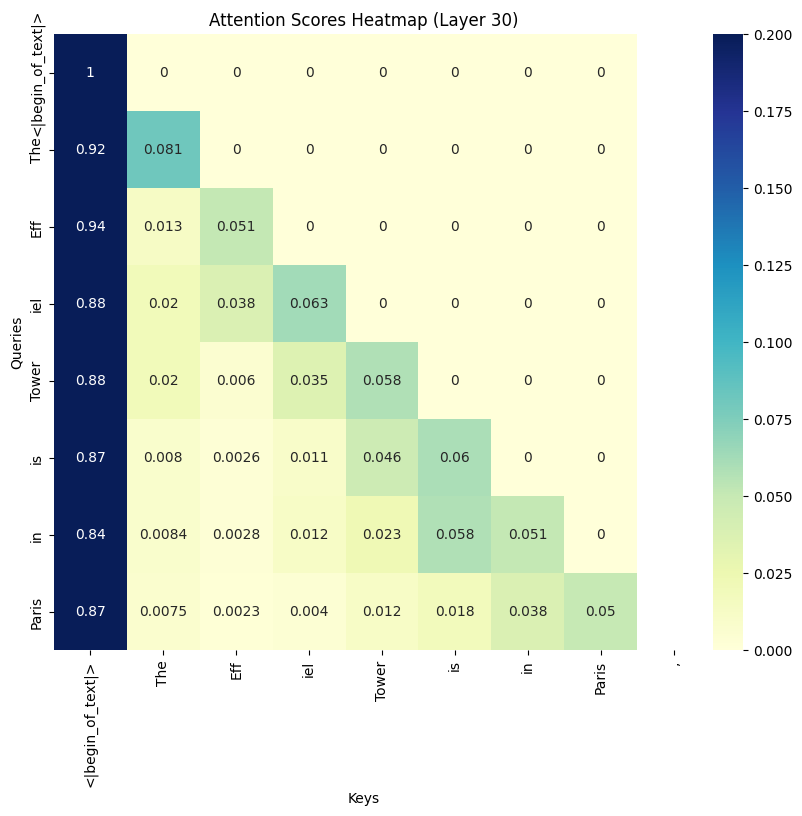

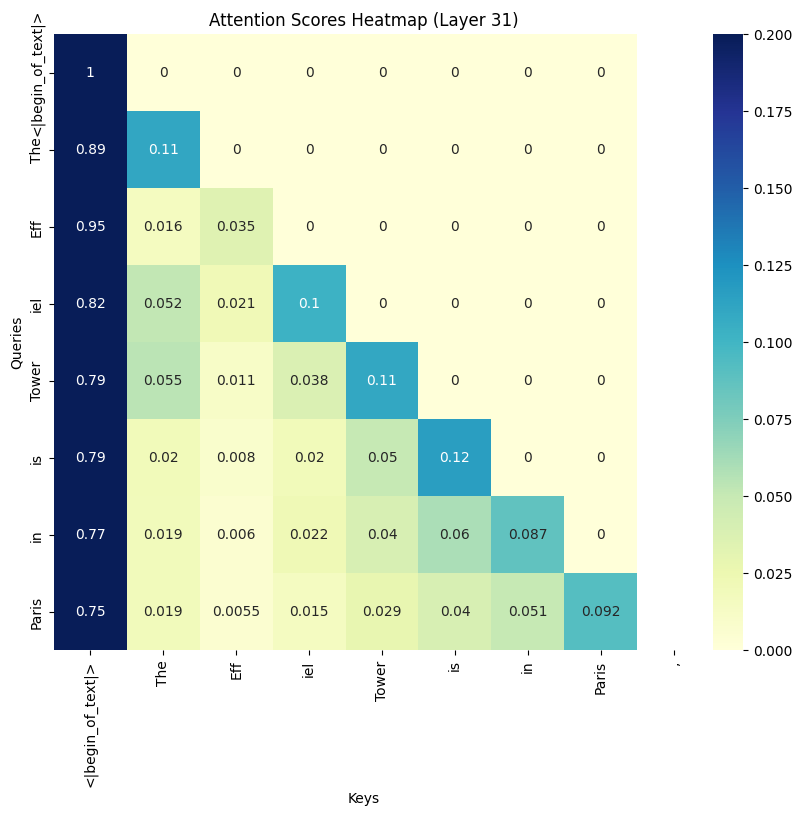

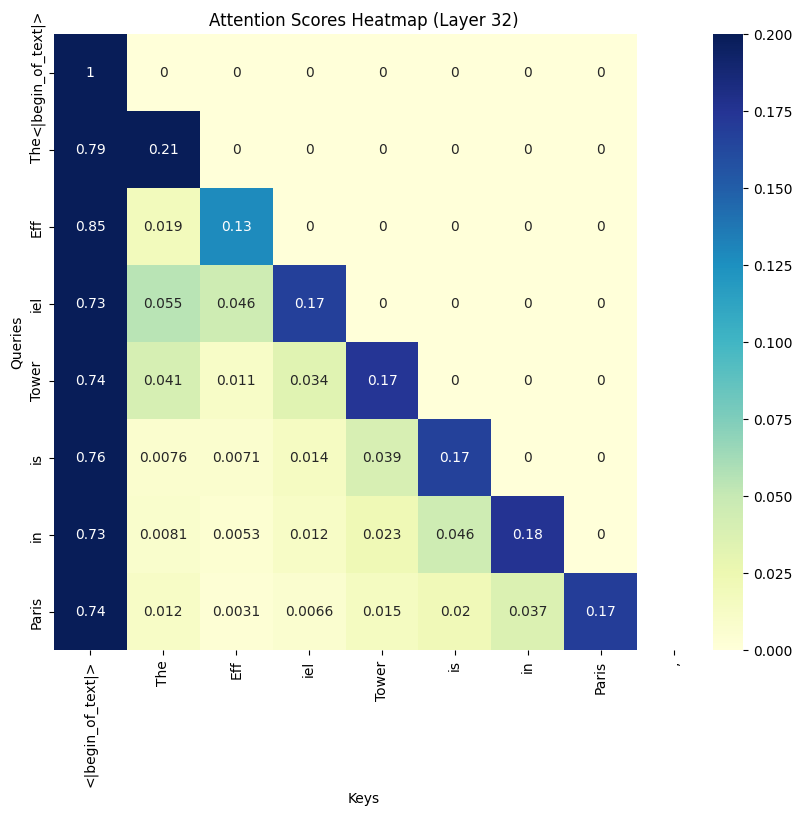

In [40]:

# 输入文本
input_text = "The Effiel Tower is in"


# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 2, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 遍历每一层的注意力值
for layer_index in range(len(attentions[0])):
    all_attention = []
    max_seq_length = max([step[layer_index][0][0].shape[-1] for step in attentions])

    for step in attentions:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        all_attention.append(attn)

    # 将注意力值拼接成一个完整的矩阵
    complete_attention = np.concatenate(all_attention, axis=0)

    # 创建热力图
    plt.figure(figsize=(10, 8))
    sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
    plt.title(f'Attention Scores Heatmap (Layer {layer_index + 1})')
    plt.xlabel('Keys')
    plt.ylabel('Queries')
    plt.show()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


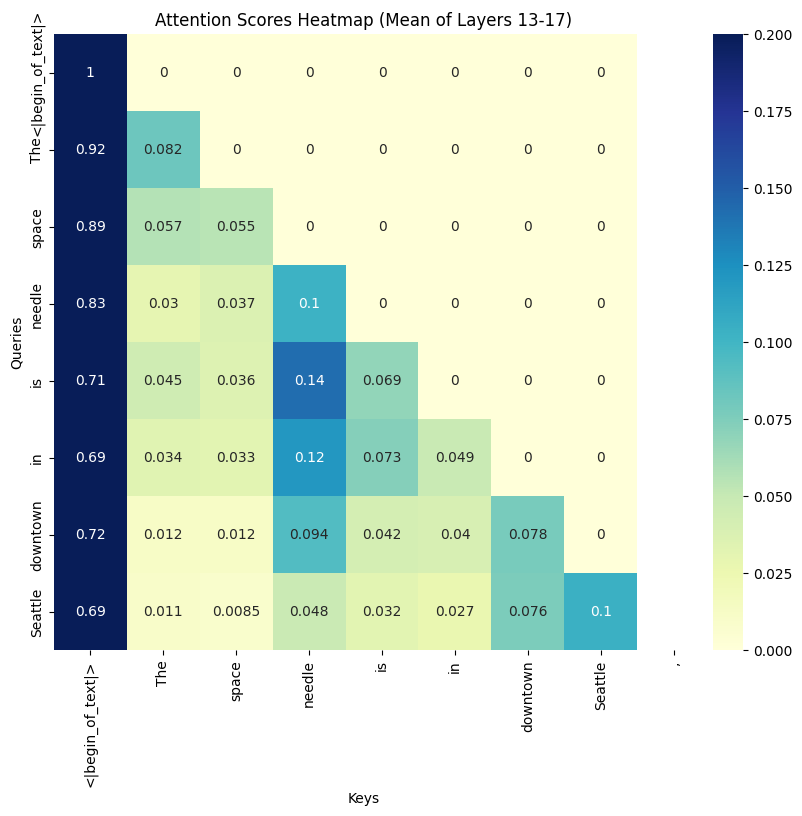

In [5]:

input_text = "The space needle is in downtown"


# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 2, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 选择第 13 到第 17 层的索引
selected_layers = range(12, 17)  # Python 索引从 0 开始，第 13 层索引为 12，第 17 层索引为 16

# 初始化一个矩阵来存储所选层的注意力值的均值
all_attention = []
max_seq_length = max([step[0][0][0].shape[-1] for step in attentions])

for step in attentions:
    layer_attention = []
    for layer_index in selected_layers:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        layer_attention.append(attn)
    # 对所选层的注意力值取均值
    mean_layer_attention = np.mean(layer_attention, axis=0)
    all_attention.append(mean_layer_attention)

# 将注意力值拼接成一个完整的矩阵
complete_attention = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
plt.title('Attention Scores Heatmap (Mean of Layers 13-17)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


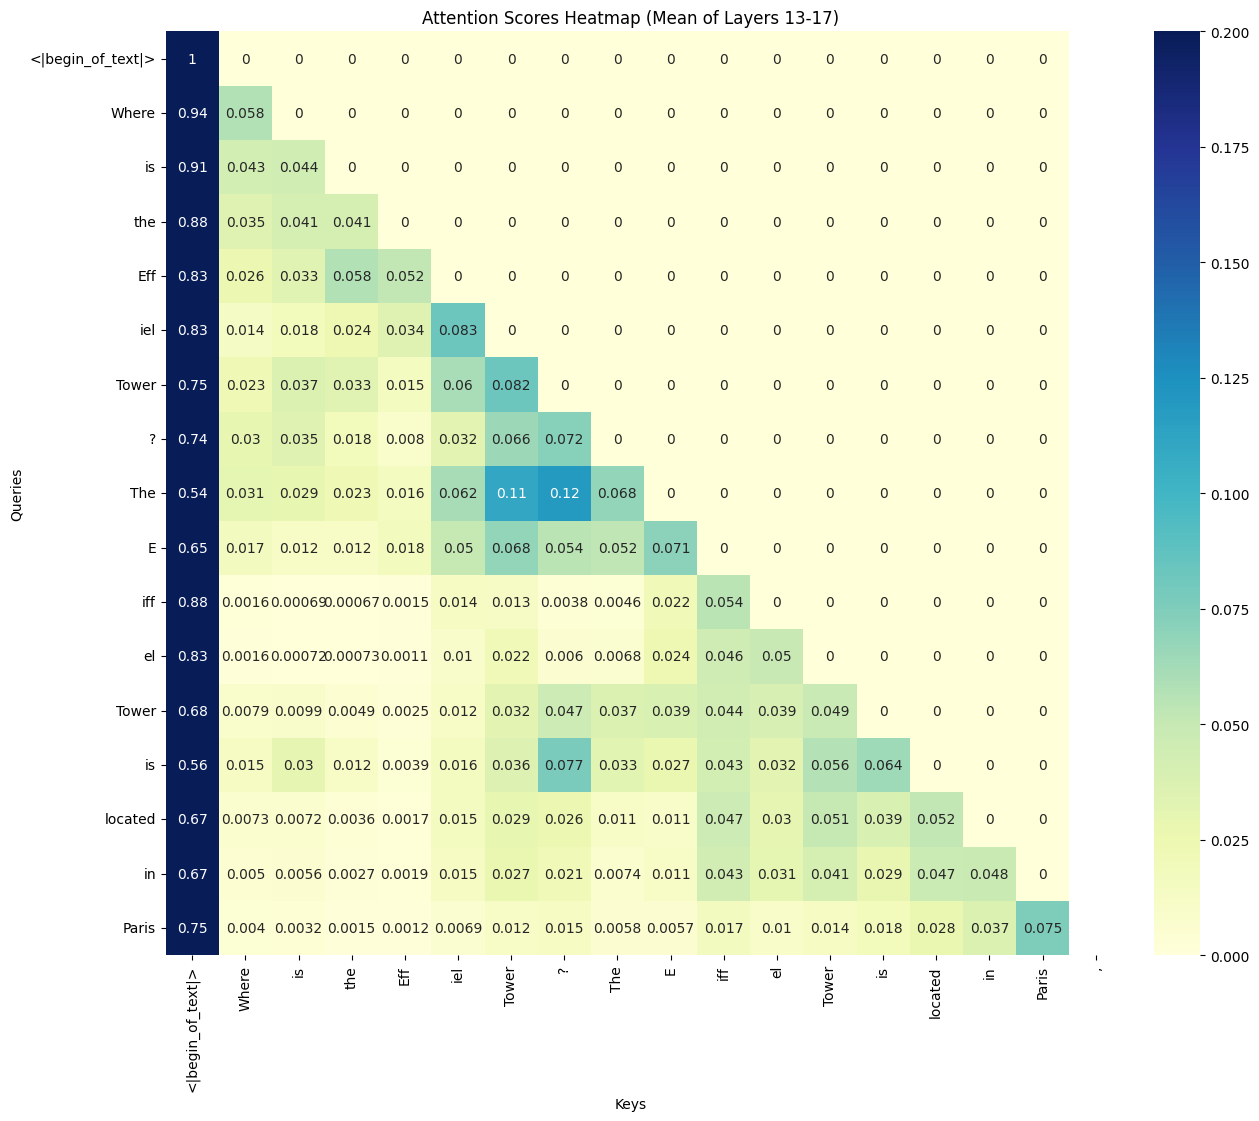

In [6]:

input_text = "Where is the Effiel Tower?"


# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 10, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 选择第 13 到第 17 层的索引
selected_layers = range(12, 17)  # Python 索引从 0 开始，第 13 层索引为 12，第 17 层索引为 16

# 初始化一个矩阵来存储所选层的注意力值的均值
all_attention = []
max_seq_length = max([step[0][0][0].shape[-1] for step in attentions])

for step in attentions:
    layer_attention = []
    for layer_index in selected_layers:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        layer_attention.append(attn)
    # 对所选层的注意力值取均值
    mean_layer_attention = np.mean(layer_attention, axis=0)
    all_attention.append(mean_layer_attention)

# 将注意力值拼接成一个完整的矩阵
complete_attention = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
plt.title('Attention Scores Heatmap (Mean of Layers 13-17)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


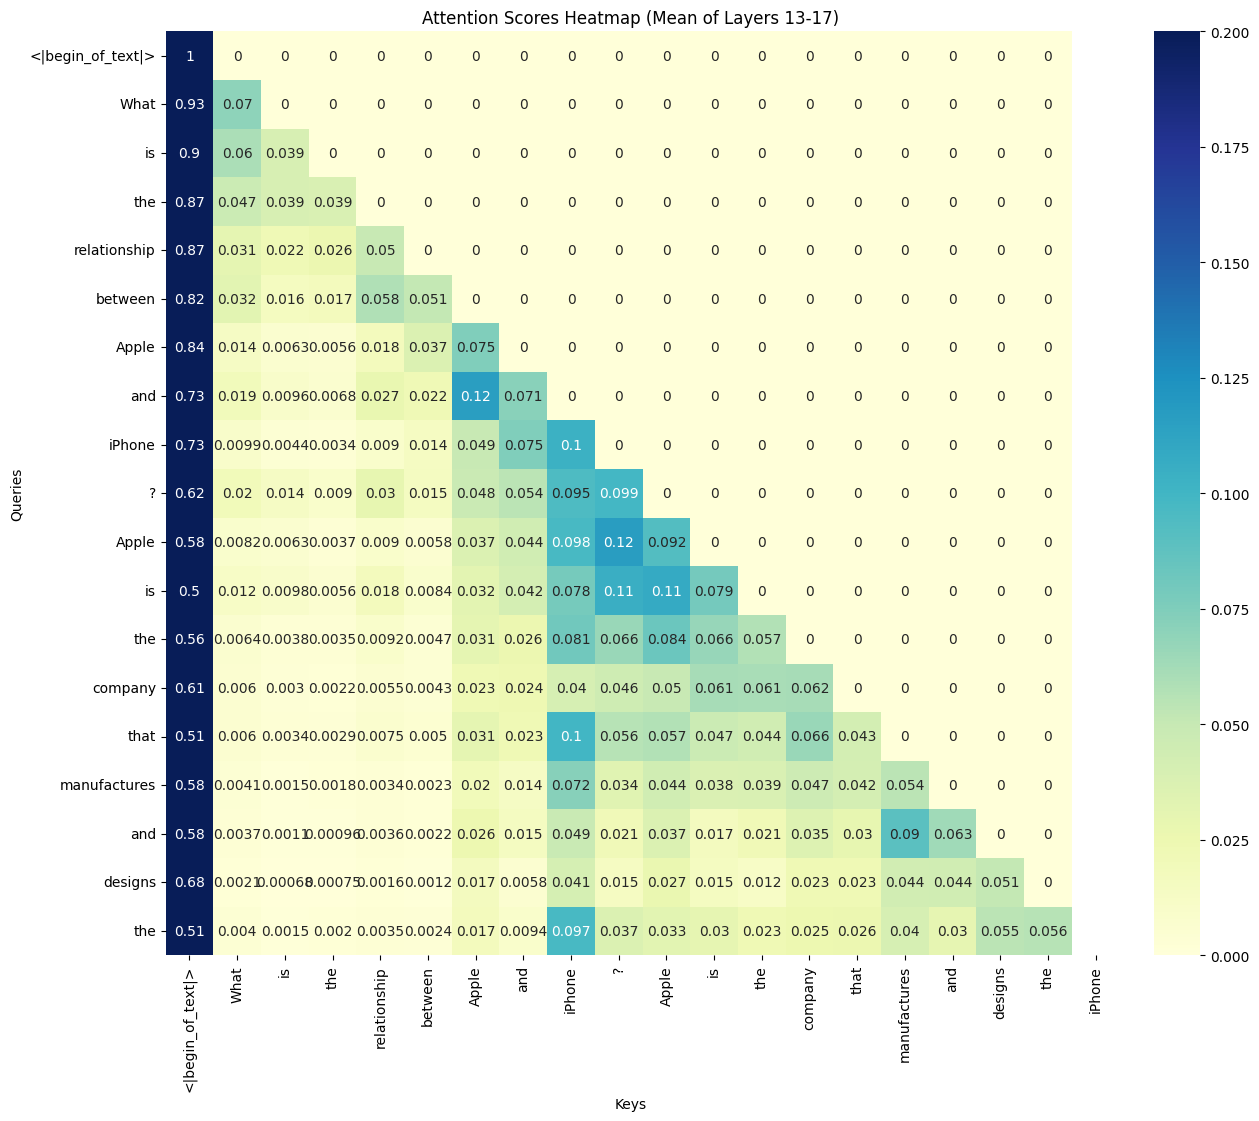

In [43]:

input_text = "What is the relationship between Apple and iPhone?"


# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 10, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 选择第 13 到第 17 层的索引
selected_layers = range(12, 17)  # Python 索引从 0 开始，第 13 层索引为 12，第 17 层索引为 16

# 初始化一个矩阵来存储所选层的注意力值的均值
all_attention = []
max_seq_length = max([step[0][0][0].shape[-1] for step in attentions])

for step in attentions:
    layer_attention = []
    for layer_index in selected_layers:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        layer_attention.append(attn)
    # 对所选层的注意力值取均值
    mean_layer_attention = np.mean(layer_attention, axis=0)
    all_attention.append(mean_layer_attention)

# 将注意力值拼接成一个完整的矩阵
complete_attention = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(15, 12))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
plt.title('Attention Scores Heatmap (Mean of Layers 13-17)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


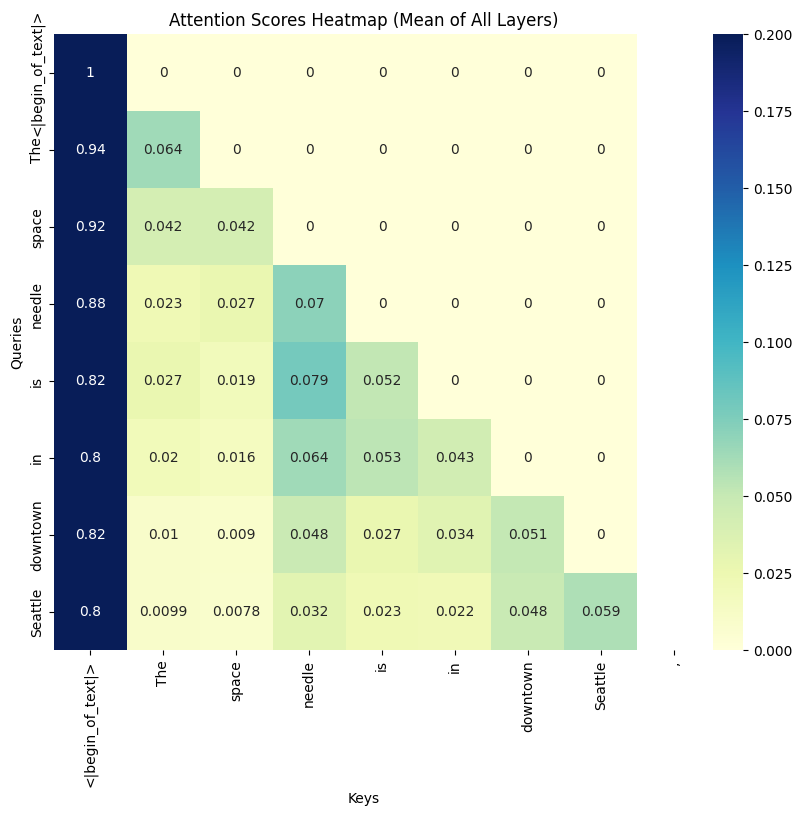

In [44]:

# 输入文本
input_text = "The space needle is in downtown"


# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 2, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 初始化一个矩阵来存储所有层的注意力值的均值
num_layers = len(attentions[0])
all_attention = []
max_seq_length = max([step[0][0][0].shape[-1] for step in attentions])

for step in attentions:
    layer_attention = []
    for layer_index in range(num_layers):
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        layer_attention.append(attn)
    # 对每一层的注意力值取均值
    mean_layer_attention = np.mean(layer_attention, axis=0)
    all_attention.append(mean_layer_attention)

# 将注意力值拼接成一个完整的矩阵
complete_attention = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(10, 8))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
plt.title('Attention Scores Heatmap (Mean of All Layers)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


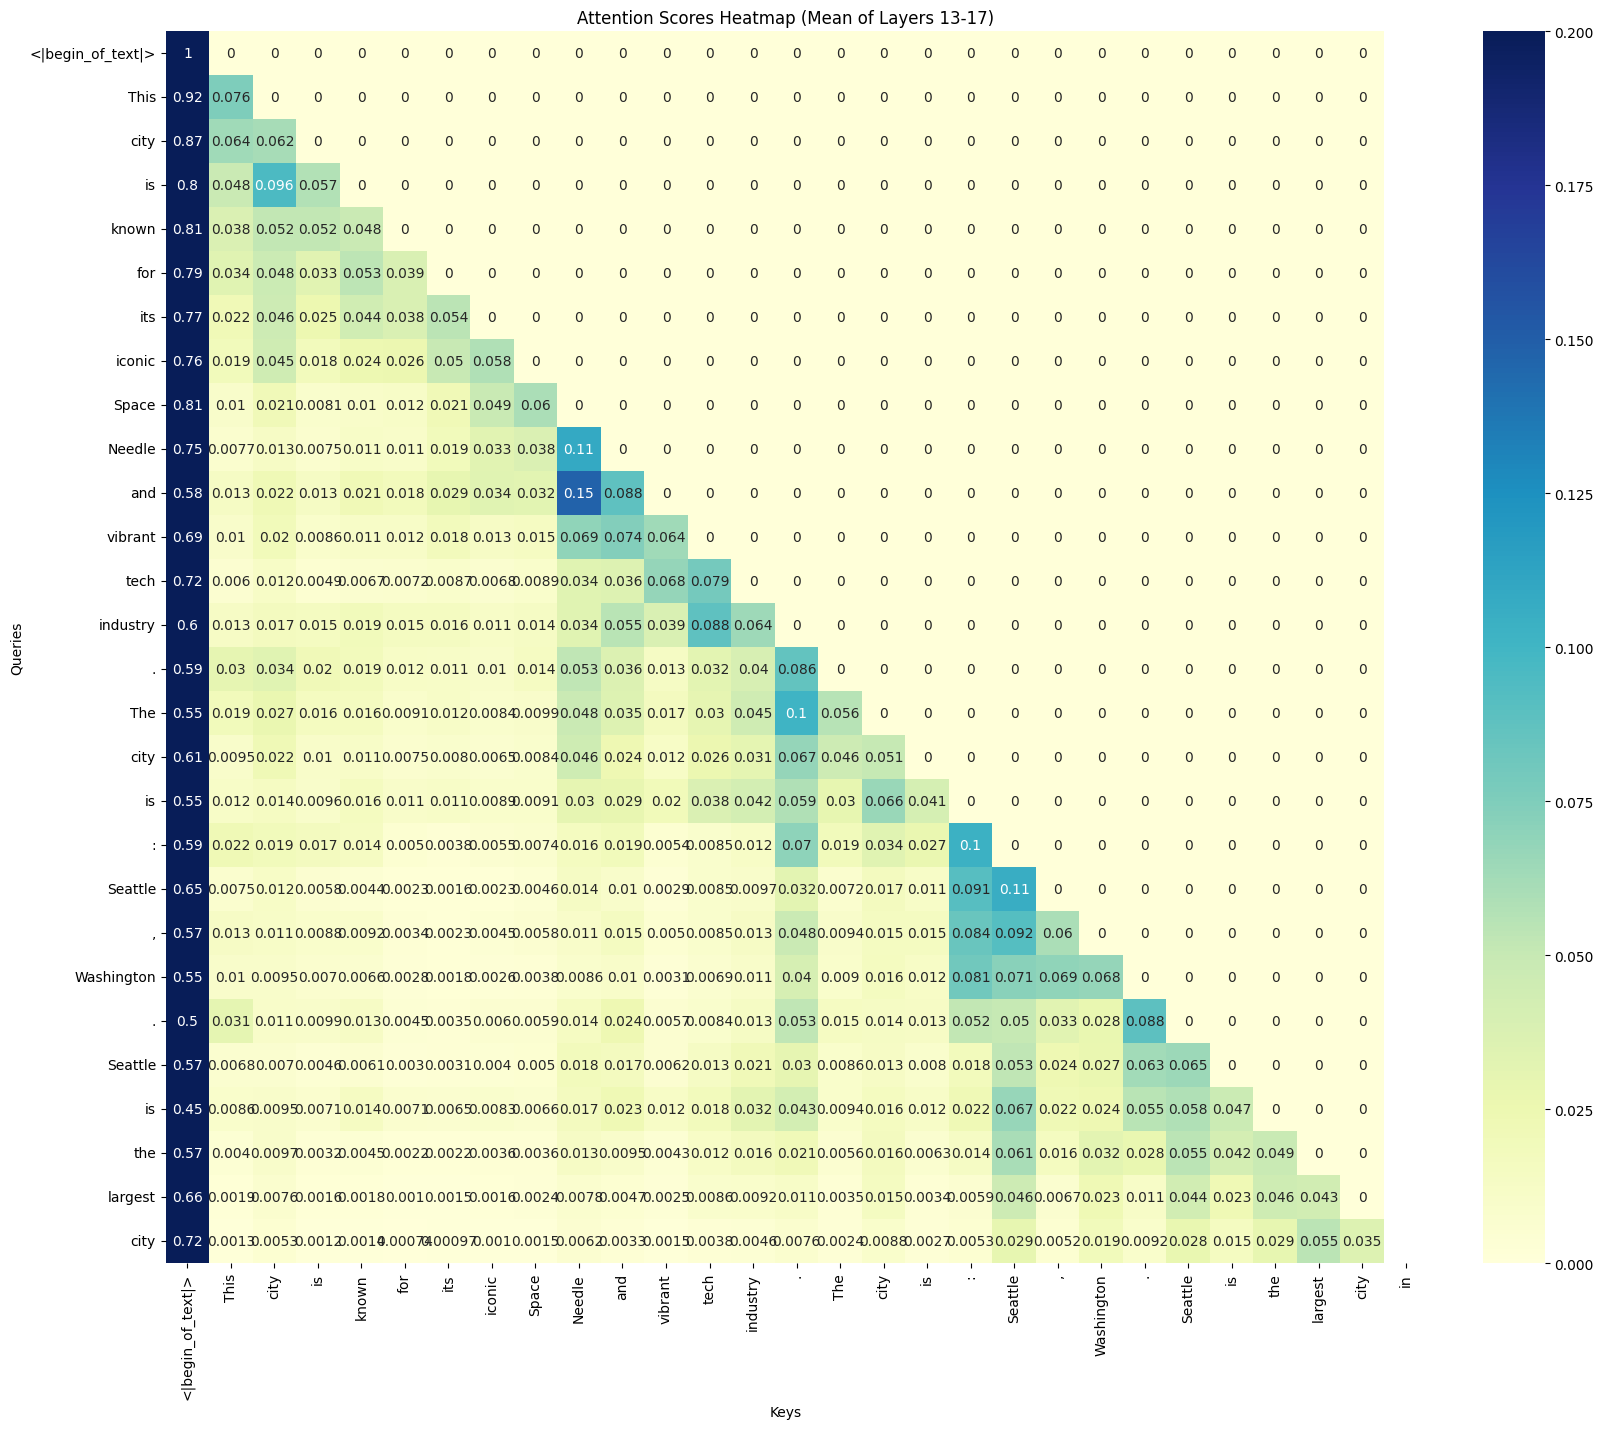

In [8]:

input_text = "This city is known for its iconic Space Needle and vibrant tech industry. The city is:"


# 将输入文本编码为 token
inputs = tokenizer(input_text, return_tensors="pt")

# 生成新 token
generate_output = model.generate(inputs['input_ids'], max_length=inputs['input_ids'].shape[1] + 10, output_attentions=True, return_dict_in_generate=True)

# 获取生成的所有 token 的注意力值
attentions = generate_output.attentions  # 这是一个包含所有生成步骤的注意力值的元组
generated_ids = generate_output.sequences[0]  # 获取生成的 token 序列

# 获取所有 token 标签
tokens = tokenizer.convert_ids_to_tokens(generated_ids)
tokens = [token.replace('Ġ', '') for token in tokens]

# 选择第 13 到第 17 层的索引
selected_layers = range(12, 17)  # Python 索引从 0 开始，第 13 层索引为 12，第 17 层索引为 16

# 初始化一个矩阵来存储所选层的注意力值的均值
all_attention = []
max_seq_length = max([step[0][0][0].shape[-1] for step in attentions])

for step in attentions:
    layer_attention = []
    for layer_index in selected_layers:
        attn = step[layer_index][0].detach().cpu().numpy()  # 形状 (num_heads, sequence_length, sequence_length)
        attn = attn.mean(axis=0)  # 对所有注意力头取均值，形状 (sequence_length, sequence_length)
        pad_width = max_seq_length - attn.shape[-1]
        if pad_width > 0:
            attn = np.pad(attn, ((0, 0), (0, pad_width)), mode='constant', constant_values=0)
        layer_attention.append(attn)
    # 对所选层的注意力值取均值
    mean_layer_attention = np.mean(layer_attention, axis=0)
    all_attention.append(mean_layer_attention)

# 将注意力值拼接成一个完整的矩阵
complete_attention = np.concatenate(all_attention, axis=0)

# 创建热力图
plt.figure(figsize=(20, 16))
sns.heatmap(complete_attention, annot=True, cmap='YlGnBu', xticklabels=tokens, yticklabels=tokens[:complete_attention.shape[0]], vmin=0, vmax=0.2)
plt.title('Attention Scores Heatmap (Mean of Layers 13-17)')
plt.xlabel('Keys')
plt.ylabel('Queries')
plt.show()
